In [1]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
options(warn=-1)

In [3]:
na_strings <- c(".",".b")
excel_data = read_excel("HG_PHP_Whole questions_29032020.xlsx",sheet = "ExpCall",na = na_strings)

In [4]:
dfdata = data.frame(excel_data)

In [6]:
print('Dimensions of dataset:')
dim(dfdata)

[1] "Dimensions of dataset:"


[1] 542  64

# Data Cleaning

In [7]:
#number of columns = 64
#eliminating rows having high missing values (more than 58 missing features of each row).
cont_na <- apply(dfdata, MARGIN = 1, function(x) sum(is.na(x)))
dfdata <- dfdata[cont_na < 59,]

In [8]:
#pick rows with Condition Groups (1=People with plantar heel pain; 2= Other foot problem; 3=Healthy control) 
filter <- dfdata$grp < 4
dfdata = dfdata[filter,]

In [9]:
dfdata <- droplevels(dfdata)

In [10]:
#converting numeric column age into categories 1 = 18 to 35 (Young) , 2 = 35 to 55 (Middle Aged), 3 = 55 to 75 (Adults).
dfdata$age <- findInterval(dfdata$age, c(18,35,55,75))

In [11]:
#converting numeric column bmi into categories 1 = 0 to 18 (Underweight) , 2 = 18 to 25 (Normal), 3 = 25 to 30 (Overweight), 4= Above 30 (Obese)
dfdata$bmi <- findInterval(dfdata$bmi, c(0,18.5,25,30))

In [12]:
#replace missing value of MorningPain for condition group '3'(Healthy Control group) with 2 i.e(no morning pain)
dfdata$MorningPain[dfdata$grp==3 & is.na(dfdata$MorningPain)] <- 2

In [13]:
#replace value of MornPD and SeverityPain to 0 if MorningPain == 2(i.e no morning pain)
dfdata$MornPD[dfdata$MorningPain==2] <- 0
dfdata$SeverityPain[dfdata$MorningPain==2] <- 0

In [14]:
#replace value of LevelOfSports to category 7 - 'Not Applicable' if SportsCondition == 0 (i.e the person is not involved in any sports activity)
dfdata$LevelOfSports[dfdata$SportsCondition==0] <- 7

In [15]:
#replace value of YearOfSports to 0 if LevelOfSports == 7 (i.e the person is not involved in any sports activity)
dfdata$YearofSports[dfdata$LevelOfSports==7] <- 0

In [16]:
#replace value of BackPainL to category 2 - 'Not Applicable' if BackP == 3 (i.e no back pain)
dfdata$BackpainL[dfdata$BackP==3] <- 2

In [17]:
#replace value of ReasonSleeDiff with category 5 - 'Not Applicable' if SleepDifficulty == 0(i.e no sleep difficulty)
dfdata$ReasonSleeDiff[is.na(dfdata$ReasonSleeDiff) & dfdata$SleepDifficulty==0] <- 5

In [18]:
#Assuming that most of the healthy control groups won't be having foot problems and so replacing missing values of onset of 
#healthy control group to 3 - 'Not Applicable'.

dfdata$Onset[dfdata$grp==3 & is.na(dfdata$Onset)] <- 3

In [19]:
#Assuming that most of the healthy control groups won't be having foot problems and so replacing missing values of PainSitting,
#PainWalking,PainStanding,WorkPart of healthy control group to 3 - 'Not Applicable'.

dfdata$PainSitting[dfdata$grp==3 & is.na(dfdata$PainSitting)] <- 3
dfdata$PainWalking[dfdata$grp==3 & is.na(dfdata$PainWalking)] <- 3
dfdata$PainStanding[dfdata$grp==3 & is.na(dfdata$PainStanding)] <- 3

In [20]:
#Assuming that most of the healthy control groups won't be having foot problems and so replacing missing values of WorkPart
#of healthy control group to 2 - 'Not Applicable'.

dfdata$WorkPart[dfdata$grp==3 & is.na(dfdata$WorkPart)] <- 2

In [21]:
#missing values of each column
colSums(is.na(dfdata))

pid                   grp                     g 
                    0                     0                     0 
                  age                   bmi            TimeOnFeet 
                    0                     0                     0 
      SportsCondition         ControlPreInj           MorningPain 
                    0                   320                    18 
               MornPD          SeverityPain        PreviousInjury 
                   59                    59                   208 
    OtherTendinopathy                 BackP      BackPainDistance 
                   29                    29                   404 
            BackpainL                  Work            Occupation 
                   29                    29                    29 
      OccupationClass              FHSQPain          FHSQFunction 
                   29                    31                    31 
FHSQGeneralFootHealth          FHSQFootwear                   gpa 
                   31                    31                    65 
                  pcs                   fpa                    fw 
                   44                    45                    45 
                  csi               eq5d5li               eq5d5lv 
                   44                    37                    37 
               DomLeg       RunningDistance                RunFre 
                    0                   435                   435 
        LevelOfSports          YearofSports          EffectedSide 
                    0                    22                   196 
    PHPDuration_Right      PHPDuration_Left                 Onset 
                  400                   404                     5 
          PainSitting           PainWalking          PainStanding 
                   18                    18                    18 
             WorkPart           ExtWorkPart           OtherInjury 
                   18                   440                   357 
  ConditionPrediction               ConConf        TimePrediction 
                  213                   364                   392 
            Menopause            HormoneThe         SleepDuration 
                   29                    29                    29 
      SleepDifficulty        ReasonSleeDiff         FeelingRested 
                   29                    29                    29 
              Smoking             Ethinicty             Education 
                   29                    29                    29 
                 PASS                  SANE              Footwear 
                  215                    29                    34 
          Comorbities        NumofComorbity            Depression 
                   36                    36                    36 
              eHealth 
                   29

In [22]:
#excluding columns with more missing values (above 50% missing values in a column)
dfdata = subset(dfdata, select = -c(ControlPreInj,BackPainDistance,Occupation,RunningDistance,RunFre,PHPDuration_Right,
                                 PHPDuration_Left,ExtWorkPart,OtherInjury,ConConf,TimePrediction,pid))

# Exploratory Data Analysis

In [59]:
install.packages("ggplot2")

In [24]:
library(ggplot2)

In [25]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [21]:
install.packages("ggridges")

package 'ggridges' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\RtmpghxFqj\downloaded_packages


In [26]:
library(ggridges)

In [55]:
if (!require("data.table")) install.packages("data.table")

In [27]:
# Load the data.table package
library(data.table)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



## A) Who are the people involved in the study?

### Number of patients in three condition groups

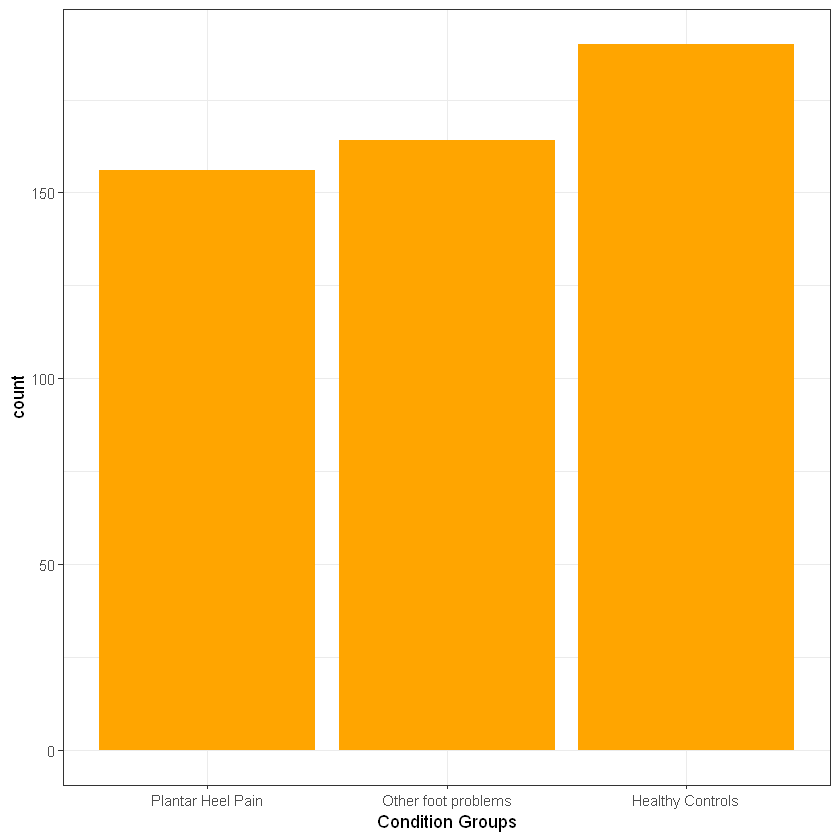

In [28]:
ggplot(dfdata, aes(x = grp)) + 
          geom_bar(fill="orange")+
         labs(x="Condition Groups")+
        theme_bw()+
        scale_x_discrete(limits = c("1","2","3"),
                           labels = c("Plantar Heel Pain", "Other foot problems","Healthy Controls"))

### Gender Distribution

In [29]:
plotdata <- dfdata %>%
  group_by(g, grp) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

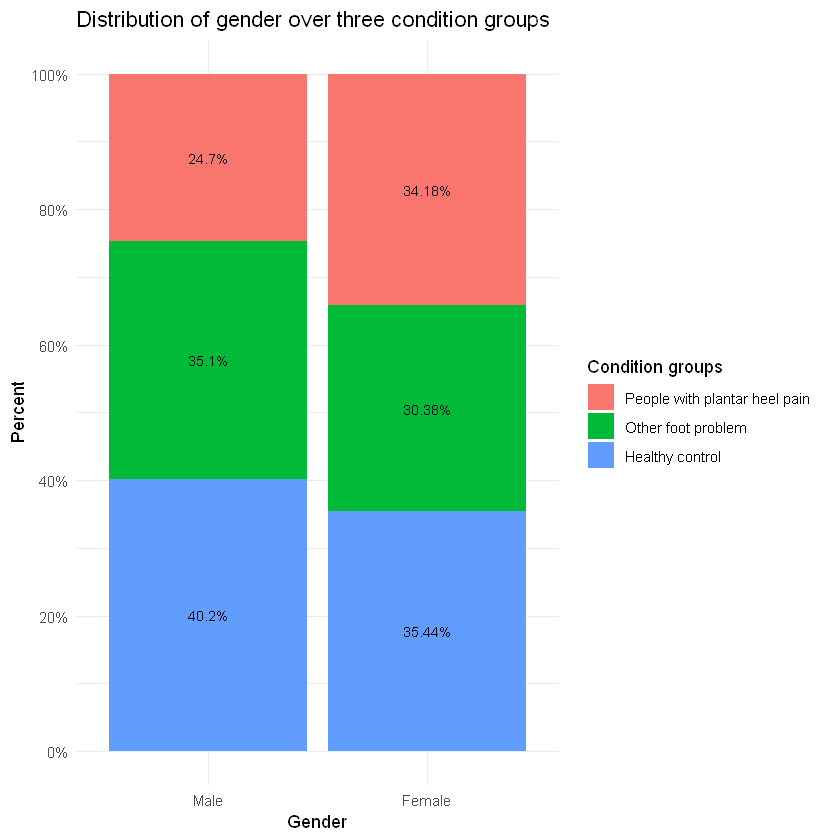

In [30]:
ggplot(data=plotdata,aes(x=g,y= pct,fill=as.factor(grp)))+geom_bar(position = "fill",stat = "identity") +
    ggtitle(label="Distribution of gender over three condition groups")+
    theme_minimal()+
    scale_x_discrete(limits = c("1","2"),
                   labels = c("Male", "Female"))+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Gender")+
     labs(y = "Percent")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Condition groups", labels = c("People with plantar heel pain", "Other foot problem", 
                              "Healthy control"))

data shows that plantar heel pain is slightly more common in females compared to males. Also, males are facing more other foot problems compared to females.

### Age Distribution

In [31]:
plotdata <- dfdata %>%
  group_by(g,age,grp) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

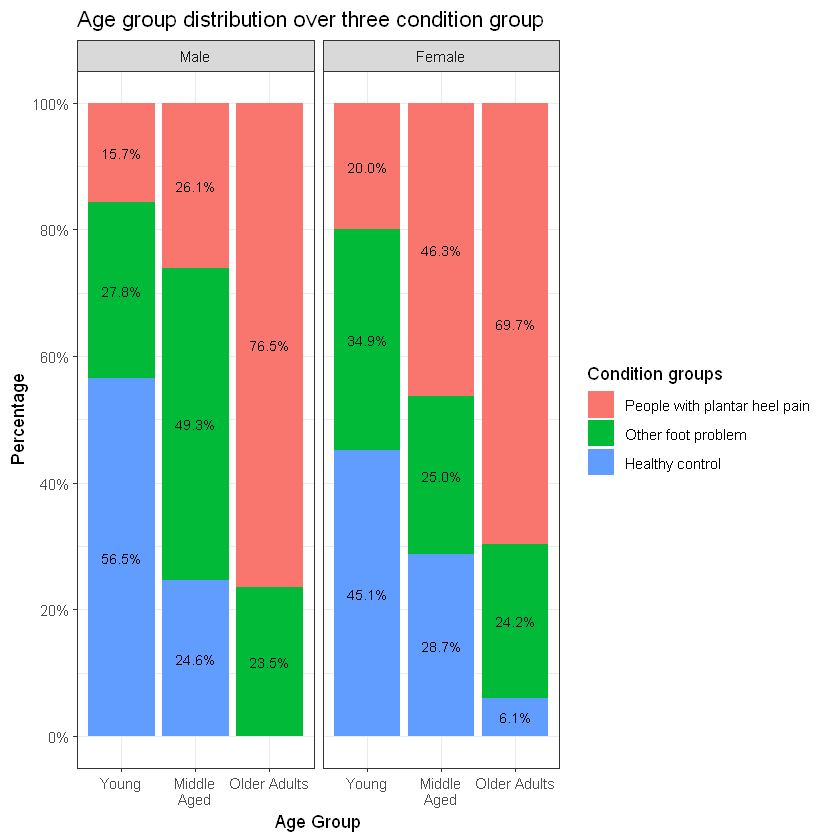

In [32]:
gender_label <- list("Male","Female")

variable_labeller <- function(variable,value){
  return(gender_label[value])
}

ggplot(data=plotdata,aes(x=age,y=pct,fill=as.factor(grp)))+ geom_bar(position = "fill",stat="identity")+
    facet_wrap(~g,labeller=variable_labeller)+
    ggtitle(label="Age group distribution over three condition group")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3"),labels = c("Young", "Middle\nAged","Older Adults"))+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Age Group")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Condition groups", labels = c("People with plantar heel pain", "Other foot problem", 
                              "Healthy control"))

Data shows that young age group (18 to 34 year-olds) are mostly healthy in both male and female. Almost 50% of females of middle aged (35 to 55 year-olds) are having plantar heel pain problem whereas 50% males of middle aged are facing other problems. Old age group (56 to 75 year-olds) are more vulnerable to plantar heel pain problem than other age groups. Also, data shows that older men are not healthy, which is suspicious.

### BMI Distribution 

BMI ranges:

Below 18.5 -> Underweight

18.5 to 24.9 -> Normal or healthy weight

25.0 to 29.9 -> Overweight

30.0 to above -> Obese

In [33]:
plotdata <- dfdata %>%
  group_by(bmi,grp) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

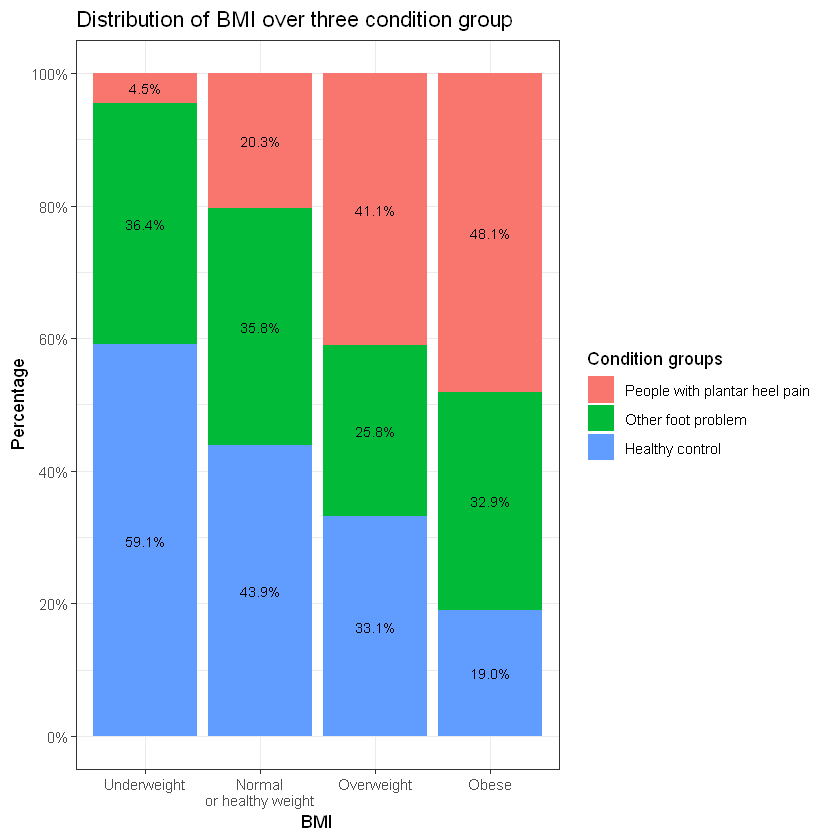

In [34]:
ggplot(data=plotdata,aes(x=bmi,y=pct,fill=as.factor(grp)))+geom_bar(position = "fill",stat="identity")+
    ggtitle(label="Distribution of BMI over three condition group")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3","4"),labels = c("Underweight","Normal\nor healthy weight","Overweight","Obese"))+
     scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="BMI")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Condition groups", labels = c("People with plantar heel pain", "Other foot problem", 
                              "Healthy control"))

Data shows that underweight and normal weight people are mostly healthy or have other foot problems. Data shows that there are very less chances of underweight people to have plantar heel pain problem. There are high percentage of overweight and obese people having plantar heel pain.

### Ethinicity

In [35]:
#remove missing values.
filter_missingvalues <- !is.na(dfdata$Ethinicty)

In [36]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,Ethinicty) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

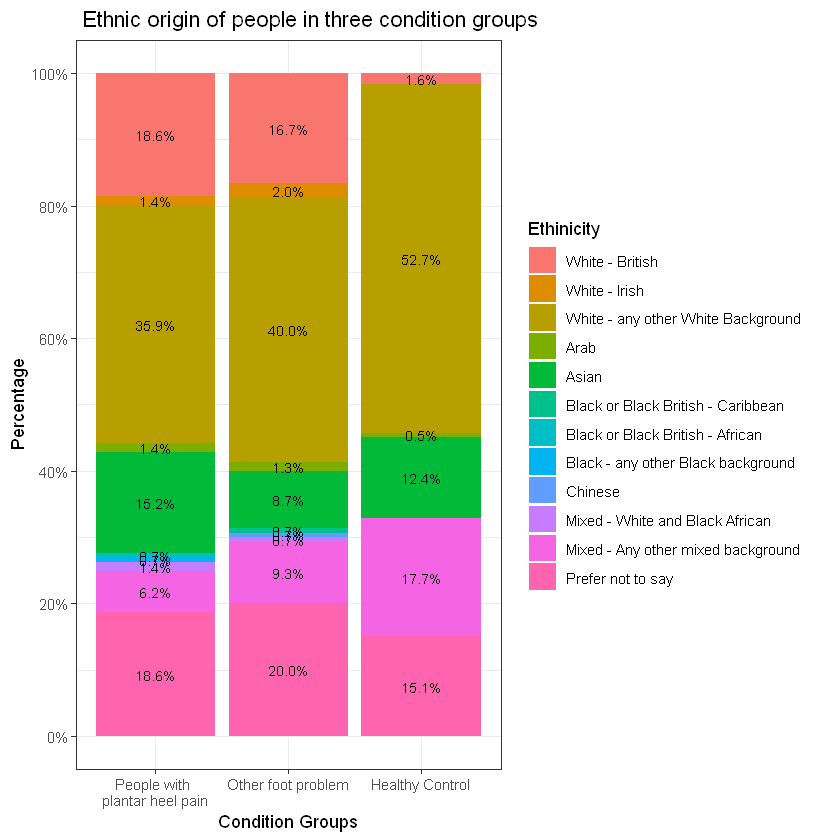

In [37]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Ethinicty))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label=" Ethnic origin of people in three condition groups")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with \nplantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Ethinicity", labels = c("White - British", "White - Irish", "White - any other White Background", "Arab", "Asian", "Black or Black British - Caribbean", "Black or Black British - African", "Black - any other Black background", "Chinese", "Mixed - White and Black African", "Mixed - Any other mixed background", "Prefer not to say", "Other"))

Ethnic origin data shows that White – British and Asian ethnicity are more in plantar heel pain group compared to other condition groups. It also reveals that White-Irish, Black people, Chinese and Mixed-White and Black Africans are not healthy, which is quite dubious

### Ocupation class Distribution

In [38]:
#eliminating missing values
filter_grp <- !is.na(dfdata$OccupationClass)

In [39]:
plotdata <- dfdata[filter_grp,] %>%
  group_by(grp,OccupationClass) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

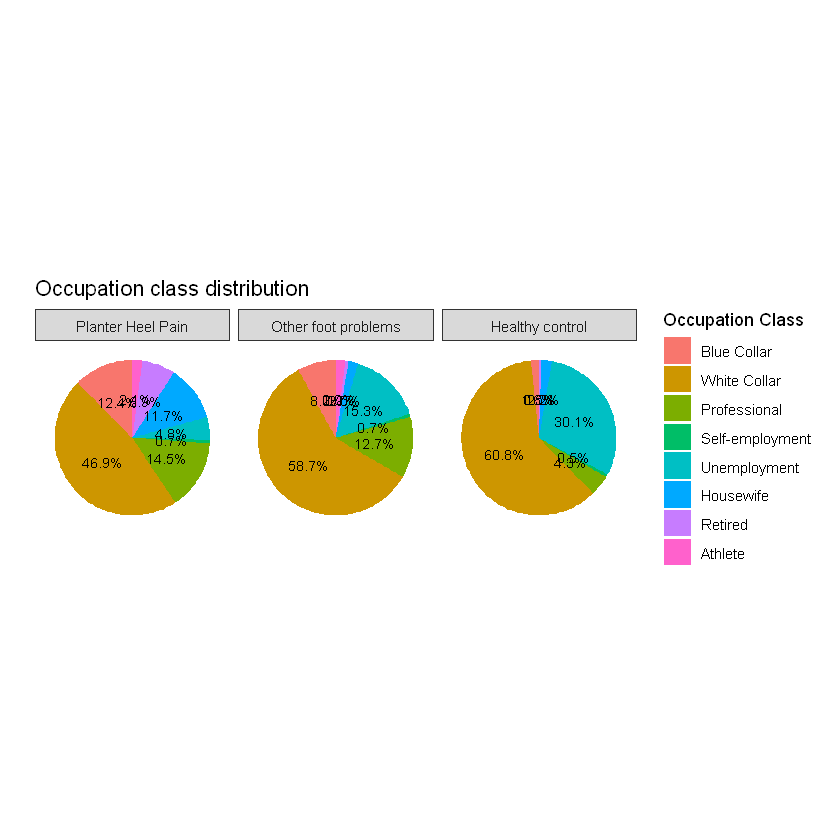

In [40]:
grp_label <- list("Planter Heel Pain","Other foot problems","Healthy control")

variable_labeller <- function(variable,value){
  return(grp_label[value])
}

ggplot(data=plotdata)+aes(x="",y=pct,fill=as.factor(OccupationClass))+
    geom_bar(position="fill",stat="identity")+
    ggtitle("Occupation class distribution")+
    coord_polar(theta="y")+
    facet_wrap(~grp,labeller=variable_labeller)+
    theme_bw()+ ylab("")+xlab("")+
    theme(axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank())+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Occupation Class", labels = c("Blue Collar","White Collar","Professional","Self-employment",
                              "Unemployment","Housewife","Retired","Athlete"))



Data shows that White collar occupation patients are more in the trial compared to other occupations. Healthy control group have high percentage of unemployed patients compared to other groups. Retired, Blue collar and Professional occupation class are more in plantar heel pain compared to other groups. 

### Education Level

In [41]:
#remove missing values.
filter_missingvalues <- !is.na(dfdata$Education)

In [42]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,Education) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

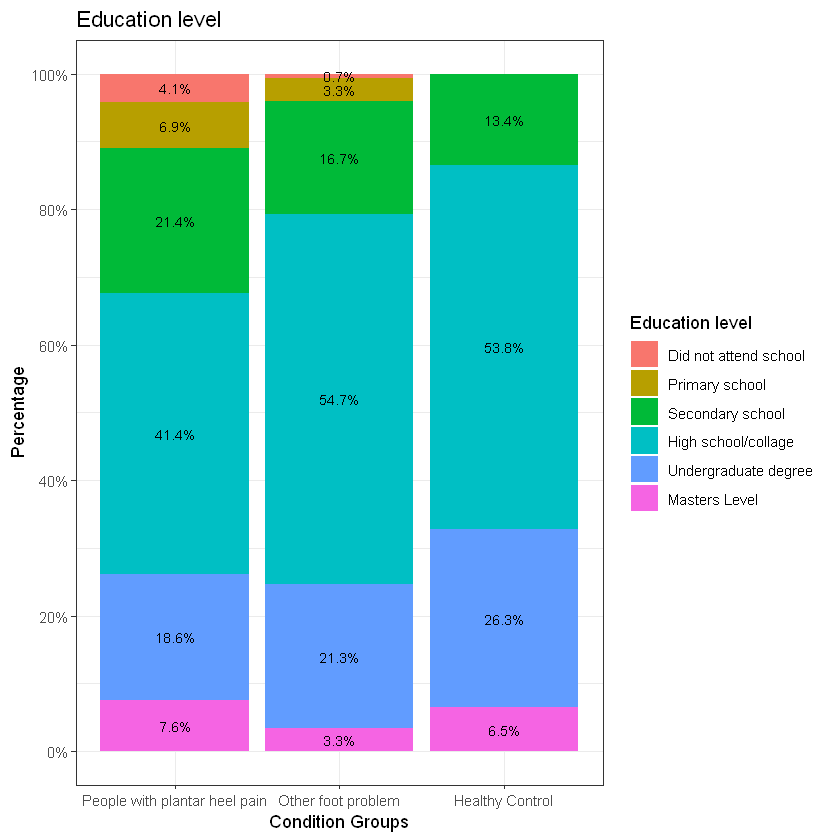

In [43]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Education))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Education level")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Education level", labels = c("Did not attend school", "Primary school", "Secondary school", "High school/collage", "Undergraduate degree", "Masters Level", "Doctor of Philosophy/PhD"
))

Education level data shows that patients who haven’t attended school or done primary schooling are not healthy which is hard to believe as this might be because patients in the trial are arbitrary. 

## B) What do these patients do?

### Sports Involvement

In [44]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$SportsCondition)

In [45]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,SportsCondition) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

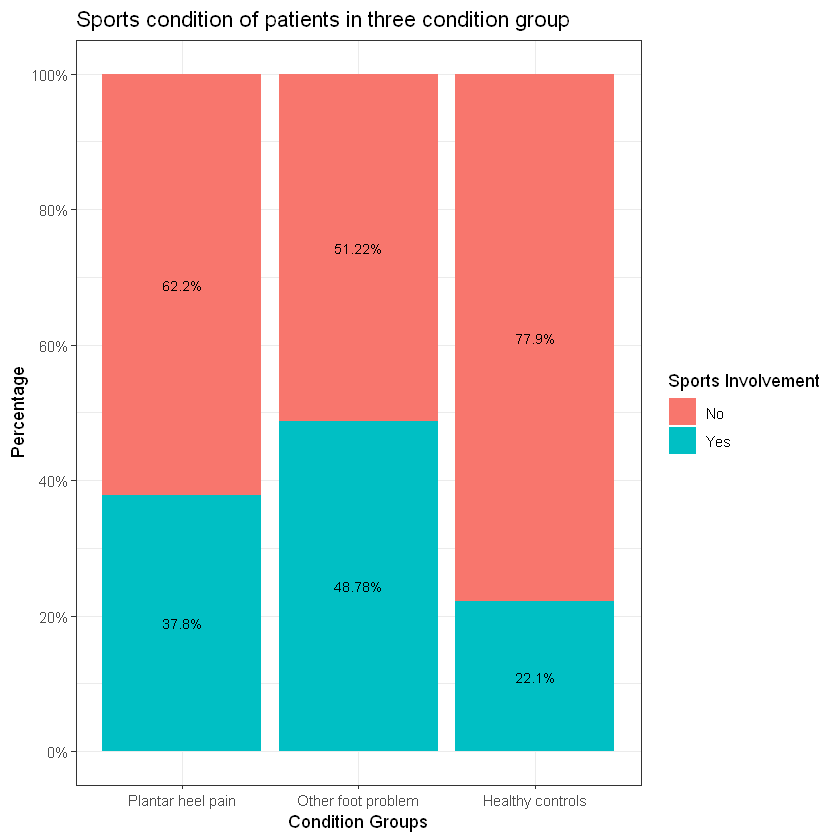

In [46]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(SportsCondition))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Sports condition of patients in three condition group")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3"),labels = c("Plantar heel pain","Other foot problem","Healthy controls"))+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Sports Involvement", labels = c("No","Yes"))



Sports Involvement data shows that control group people are not much in sport activities. Almost 50% of the patients having other foot problems are actively involved in sports.

### Levels of Sports

In [47]:
#eliminating unnecessary and missing values.
filter_missingvalues <- !is.na(dfdata$LevelOfSports) & dfdata$LevelOfSports!=7

In [48]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,LevelOfSports) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

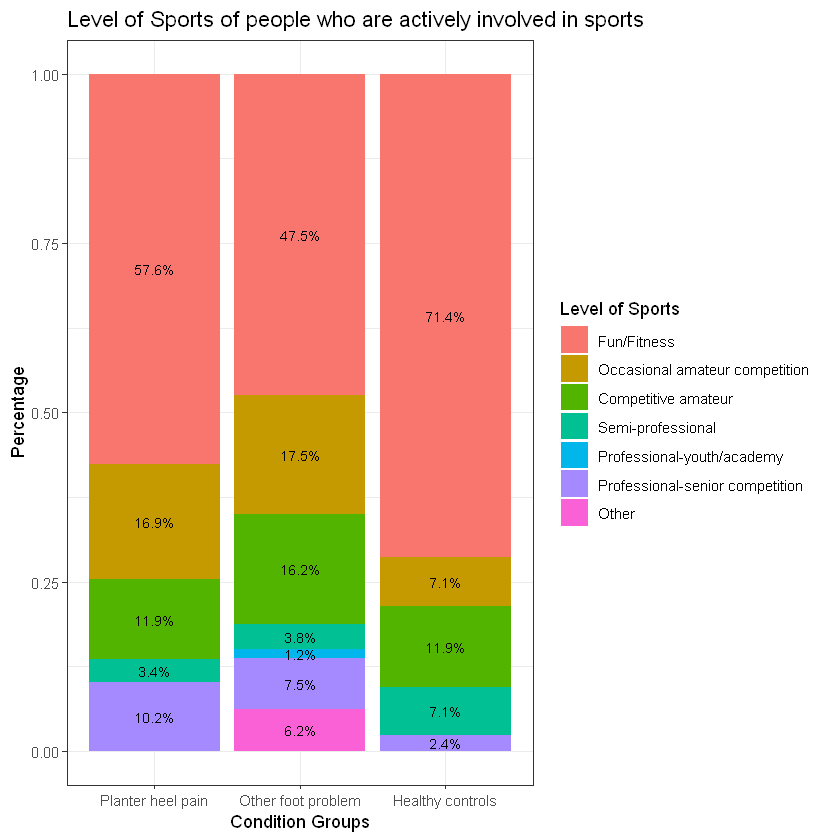

In [49]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(LevelOfSports))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Level of Sports of people who are actively involved in sports")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3"),labels = c("Planter heel pain","Other foot problem","Healthy controls"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Level of Sports", labels = c("Fun/Fitness","Occasional amateur competition", "Competitive amateur", "Semi-professional", "Professional-youth/academy", "Professional-senior competition", "Other"))

level of sports of patients involved in sports, data shows that control group are mostly in sports for fitness and fun whereas patients with other foot problems are more in competitive and professional level of sports.

### Smoking habits

In [50]:
#filter missing values
filter_smoke_missingvalues <- !is.na(dfdata$Smoking) 

In [51]:
plotdata <- dfdata[filter_smoke_missingvalues,] %>%
  group_by(grp,Smoking) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

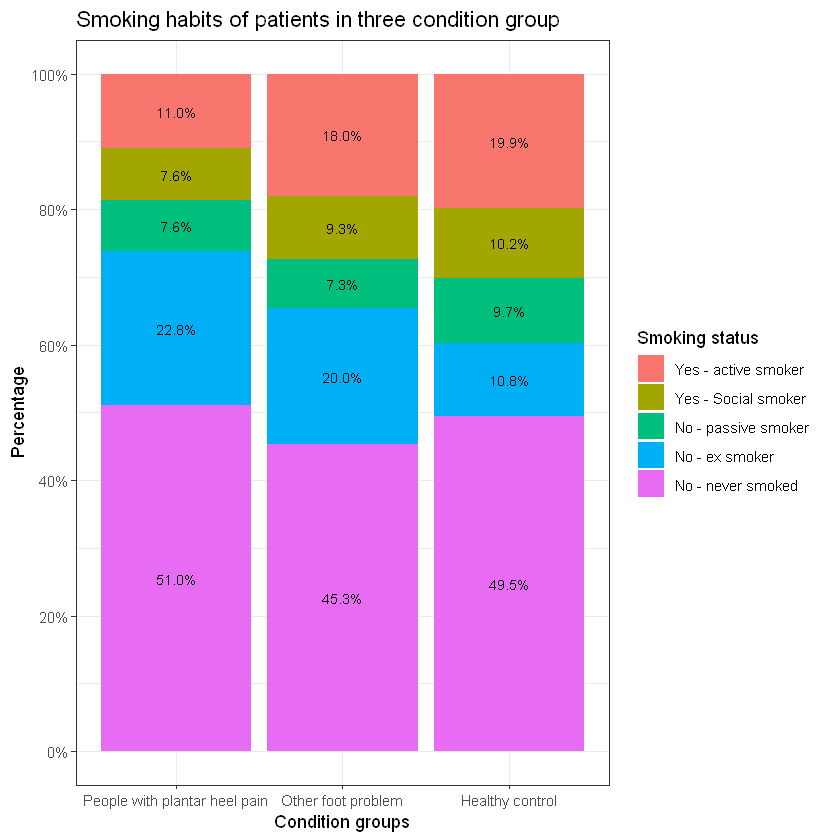

In [52]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Smoking)))+geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Smoking habits of patients in three condition group")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem", 
                              "Healthy control"))+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Condition groups")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Smoking status", labels = c("Yes - active smoker", "Yes - Social smoker", "No - passive smoker", "No - ex smoker", "No - never smoked"))

Smoking habits data shows that control group and other foot problem group have almost similar percentage of patients with smoking habits but there are comparatively more ex-smokers in other foot problem group than in control group. Less than 20% of patients with plantar heel pain problem smoke but have high percentage of ex-smokers compared to other groups.


### Foot wear worn by patients

In [53]:
#filter missing values
filter_footwear_missingvalues <- !is.na(dfdata$Footwear) 

In [54]:
plotdata <- dfdata[filter_footwear_missingvalues,] %>%
  group_by(grp,Footwear) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

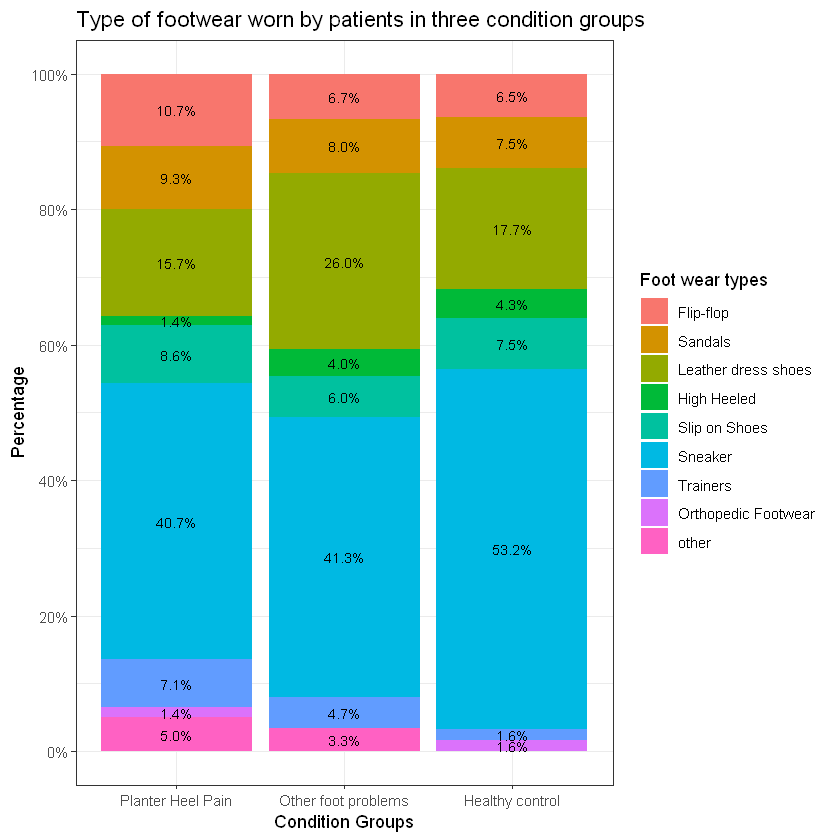

In [55]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Footwear)))+geom_bar(position = "fill",stat="identity")+
    ggtitle(label="Type of footwear worn by patients in three condition groups")+
    theme_bw()+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_x_discrete(limits=c("1","2","3"),
                        labels = c("Planter Heel Pain","Other foot problems","Healthy control"))+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    scale_fill_discrete(name = "Foot wear types", labels = c("Flip-flop","Sandals","Leather dress shoes","High Heeled","Slip on Shoes",
                                    "Sneaker","Trainers","Orthopedic Footwear","other"))

Data shows that almost 50% of patients in all condition groups wear sneakers. Orthopedic footwear, flip-flops and sandals are worn more by patients having plantar heel pain whereas Leather shoes are worn more by other foot problem patients. Also, data shows that Orthopedic footwears are worn by patients who are either having heel problem or no foot problem which is incredible. From this we can’t conclude that patients who don’t wear orthopedic footwear are having other foot problems.

### Comorbidities 

In [56]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$Comorbities)

In [57]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,Comorbities) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

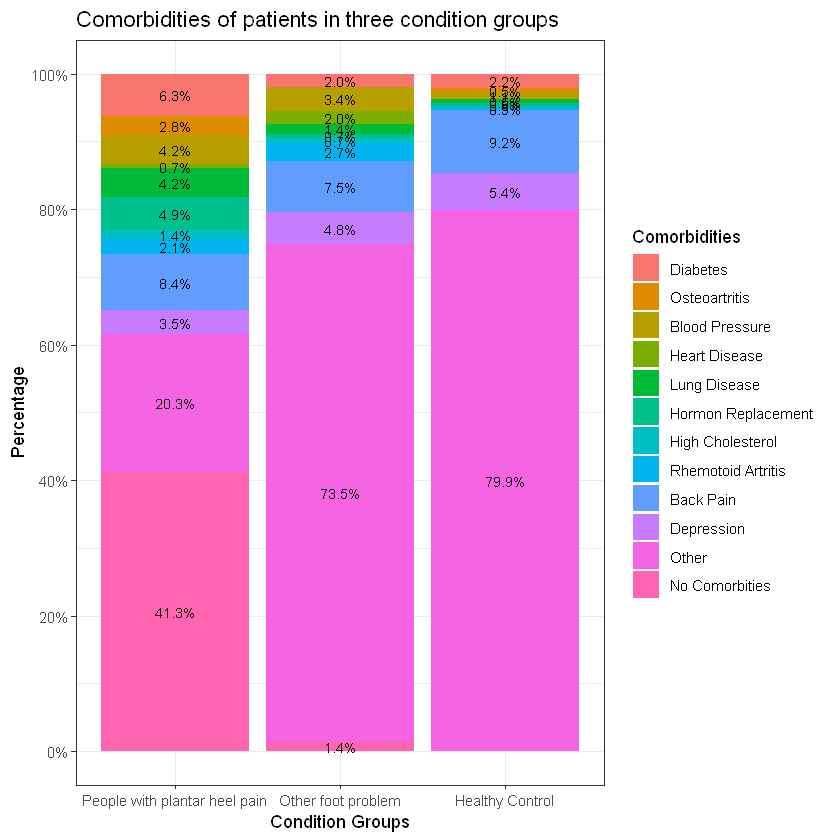

In [58]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Comorbities))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Comorbidities of patients in three condition groups")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Comorbidities", labels = c("Diabetes","Osteoartritis","Blood Pressure", "Heart Disease", "Lung Disease", "Hormon Replacement", "High Cholesterol", "Rhemotoid Artritis", "Back Pain", "Depression", "Other", "No Comorbities"))

Data shows that patients with no comorbidities are more in plantar heel pain group whereas in healthy control group there are no patients with no comorbidities which is unconvincing as control group, as the name suggests should have a greater number of patients with no comorbidities than in other groups. And, even though the patients with no comorbidities are more in plantar heel pain than in other foot problem group, we can’t use this to distinguish plantar heel pain with other foot problem groups as there are lots of imbalances in the data and this needs to be revisited once we get more data.

### Time spent on feet

Picking joint bandwidth of 1.08


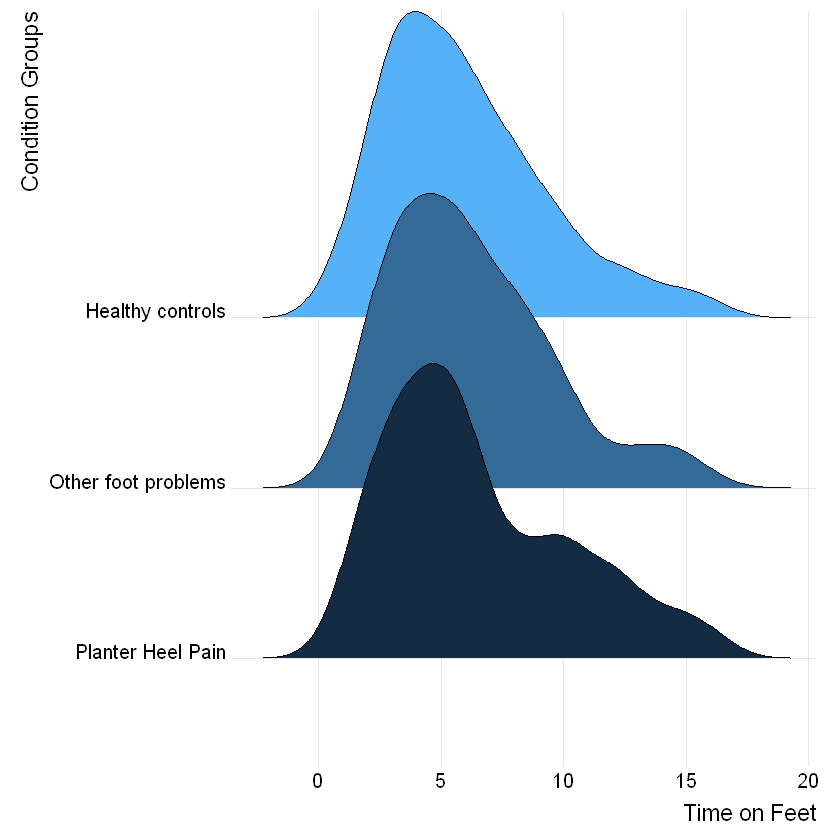

In [59]:
ggplot(dfdata, 
       aes(x = TimeOnFeet, 
           y = grp,group=grp ,
           fill = grp)) +
  geom_density_ridges() + 
  theme_ridges() +
  labs("Highway mileage by auto class") +
  theme(legend.position = "none")+
    labs(x="Time on Feet")+
    labs(y="Condition Groups")+
  scale_y_discrete(limits=c("1","2","3"),labels = c("Planter Heel Pain","Other foot problems","Healthy controls"))

Data shows that there is overlapping between them which means there is no significant difference in the time spent on feet on daily basis in all the three condition groups.

### Menopause Status

In [60]:
#select data having gender = female and menopause status Pre-menopausal,Current menopause,Post menopause

filter_female_menopause <- dfdata$g==2 & !is.na(dfdata$Menopause) & dfdata$Menopause > 0 

In [61]:
plotdata <- dfdata[filter_female_menopause,] %>%
  group_by(grp, Menopause) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

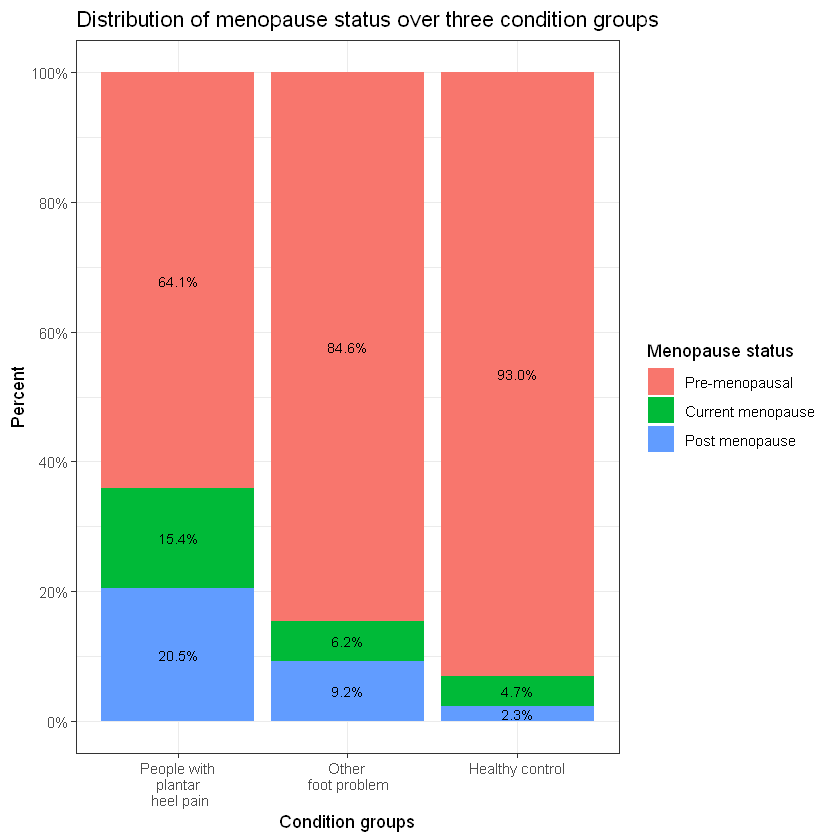

In [62]:
ggplot(plotdata,aes(x=grp,y=pct,fill=as.factor(Menopause)))+geom_bar(position = "fill",stat = "identity") +
    ggtitle(label="Distribution of menopause status over three condition groups")+
    theme_bw()+
     scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    labs(x="Condition groups")+
    labs(y="Percent")+
    scale_x_discrete(limits = c("1","2","3"),
                   labels = c("People with\nplantar\n heel pain", "Other\n foot problem", 
                              "Healthy control"))+
     geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Menopause status", labels = c("Pre-menopausal","Current menopause","Post menopause"))

From the data it is seen that females with pre-menopausal status have high chances of having planter heel pain.

### Relation of dominant leg with effected leg of people with planter heel pain and other foot problems

In [63]:
#eliminate missing values and healthy control group from the data.
filter_domleg <- !is.na(dfdata$DomLeg) & dfdata$grp != 3 & dfdata$DomLeg < 2 & 
            !is.na(dfdata$EffectedSide) & dfdata$EffectedSide < 2

In [64]:
# Convert dfdata to a data.table 
data_domLeg <- data.table(dfdata[filter_domleg,]) %>%
  # Where DomLeg type equals '0', replace DomLeg type to '2'
  .[DomLeg == 0, DomLeg := 2]

In [65]:
plotdata <- data_domLeg %>%
  group_by(grp,DomLeg, EffectedSide) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

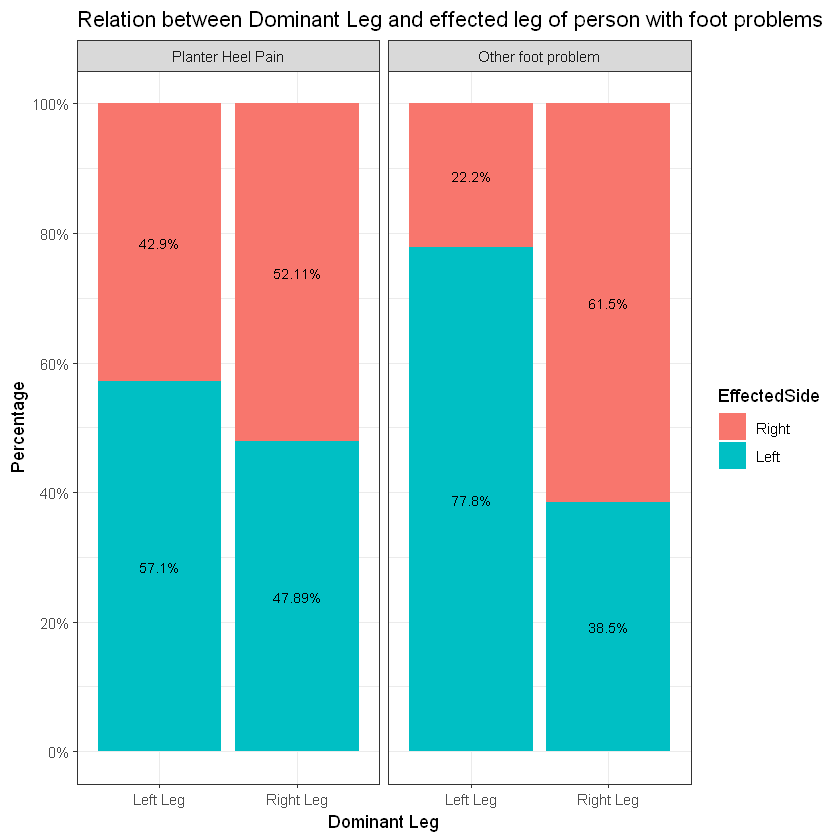

In [66]:
grp_label <- list("Planter Heel Pain","Other foot problem")

variable_labeller <- function(variable,value){
  return(grp_label[value])
}

ggplot(data=plotdata,aes(x=DomLeg,y=pct,fill=as.factor(EffectedSide))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Relation between Dominant Leg and effected leg of person with foot problems")+
    theme_bw()+
    facet_wrap(~grp,labeller=variable_labeller)+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2"),labels = c("Left Leg","Right Leg"))+
    labs(x="Dominant Leg")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "EffectedSide", labels = c("Right", "Left"))

Findings:

Person's effected leg is more likely to be his/her dominant leg.

### Hormone Replacement Therapy

In [67]:
#remove missing values.
filter_missingvalues <- !is.na(dfdata$HormoneThe)

In [68]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,HormoneThe) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

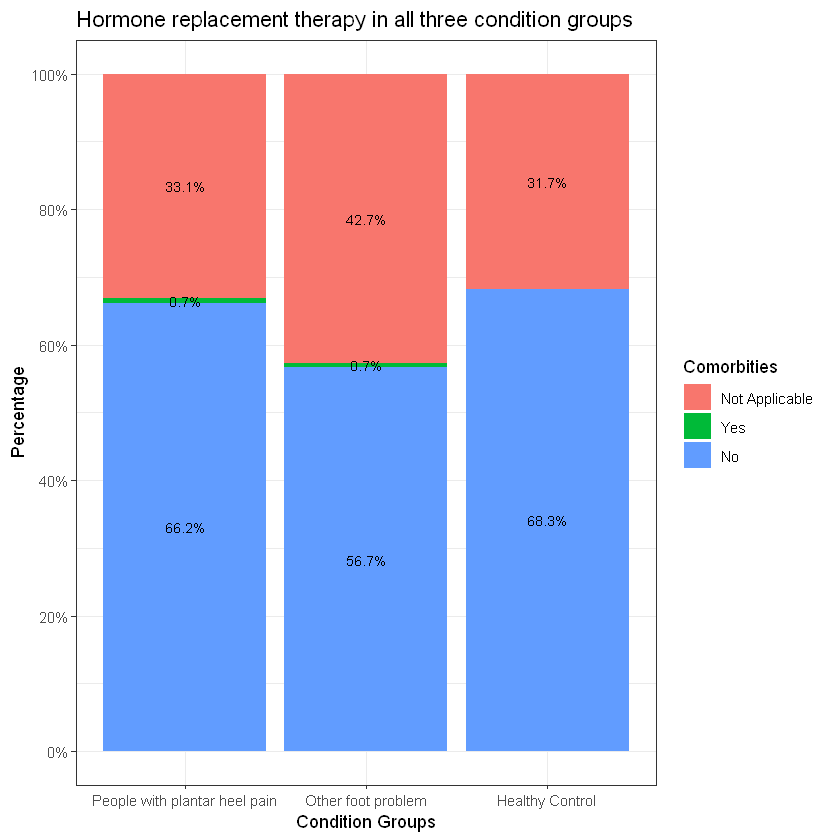

In [69]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(HormoneThe))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Hormone replacement therapy in all three condition groups")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Comorbities", labels = c("Not Applicable","Yes","No"))

Findings:

There are very few people in Planter Heel pain and foot problems who have done hormone replacement therapy.

## C) What symptoms are patients reporting?

### Morning pain

In [70]:
#eliminating missing values
filter_morningpain <- !is.na(dfdata$MorningPain) 

In [71]:
plotdata <- dfdata[filter_morningpain,] %>%
  group_by(grp,MorningPain) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

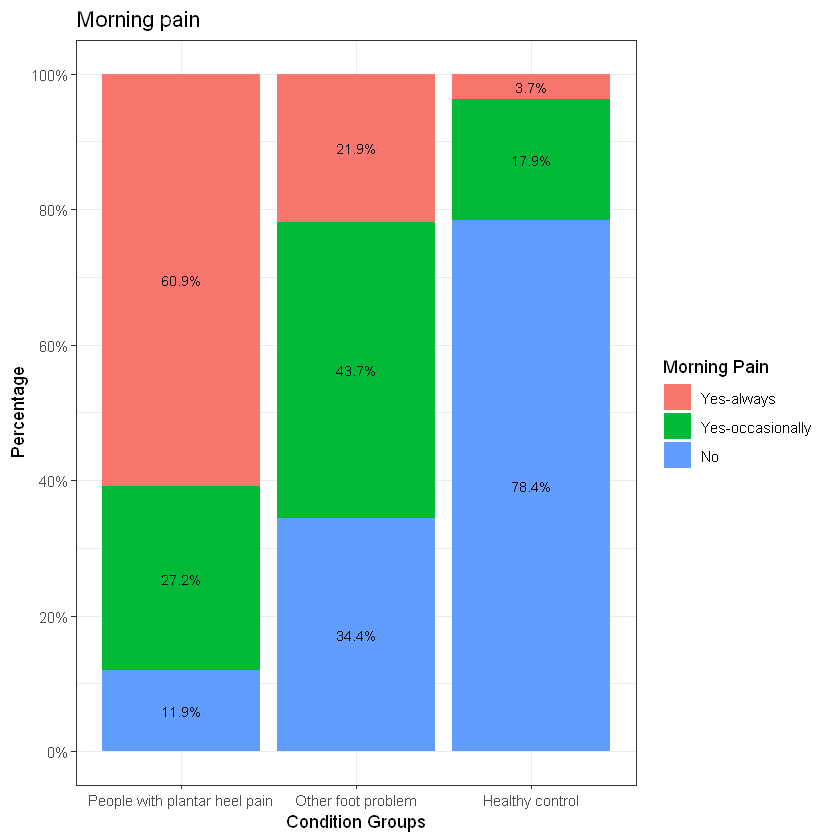

In [72]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(MorningPain))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Morning pain")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Morning Pain", labels = c("Yes-always","Yes-occasionally","No"))

60% of patients having plantar heel pain always feel pain in the morning while other foot problem group occasionally face morning pain. 

### Onset of morning pain 

In [73]:
#eliminating missing values
filter_onset <- !is.na(dfdata$Onset) & dfdata$Onset != 3

In [74]:
plotdata <- dfdata[filter_onset,] %>%
  group_by(grp,Onset) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

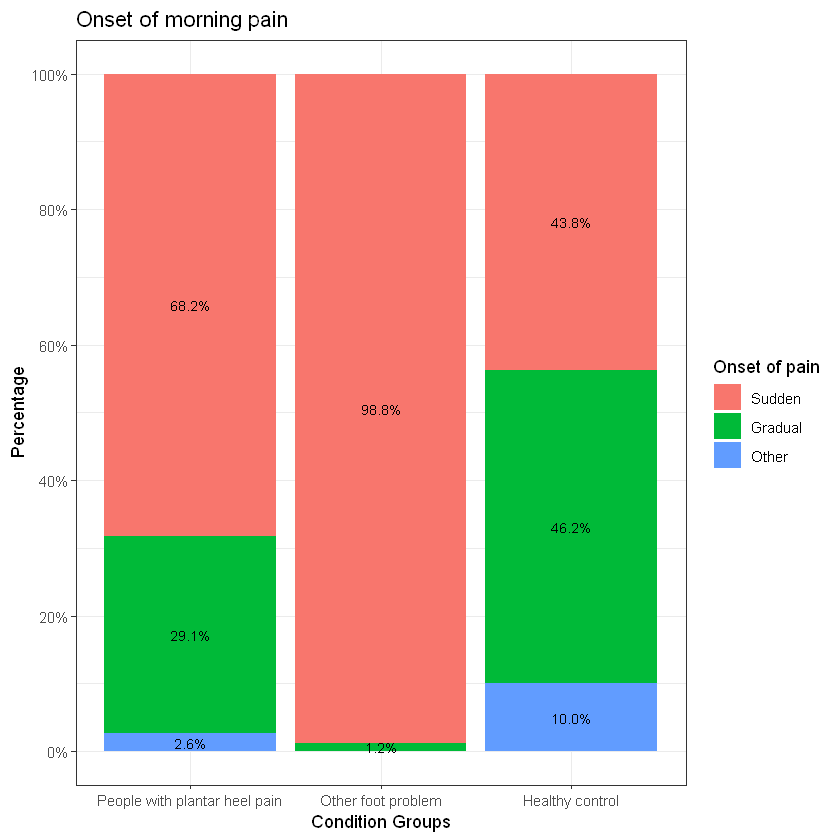

In [75]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Onset))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Onset of morning pain")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Onset of pain", labels = c("Sudden", "Gradual", "Other"))

Data shows that 70% of patients having plantar heel pain feel sudden pain in the morning whereas almost all the other foot problem group patients have sudden pain in the morning. Also, other foot problem group have no patients with other type of onset pain but this doesn’t distinguish patients with plantar heel pain from other foot problem group as there are lots of imbalances in the data which needs to be analysed again after getting more data.


### Severity of morning pain

In [76]:
#eliminating missing values and control group from the data.
filter_severitypain <- !is.na(dfdata$SeverityPain) & dfdata$grp != 3 

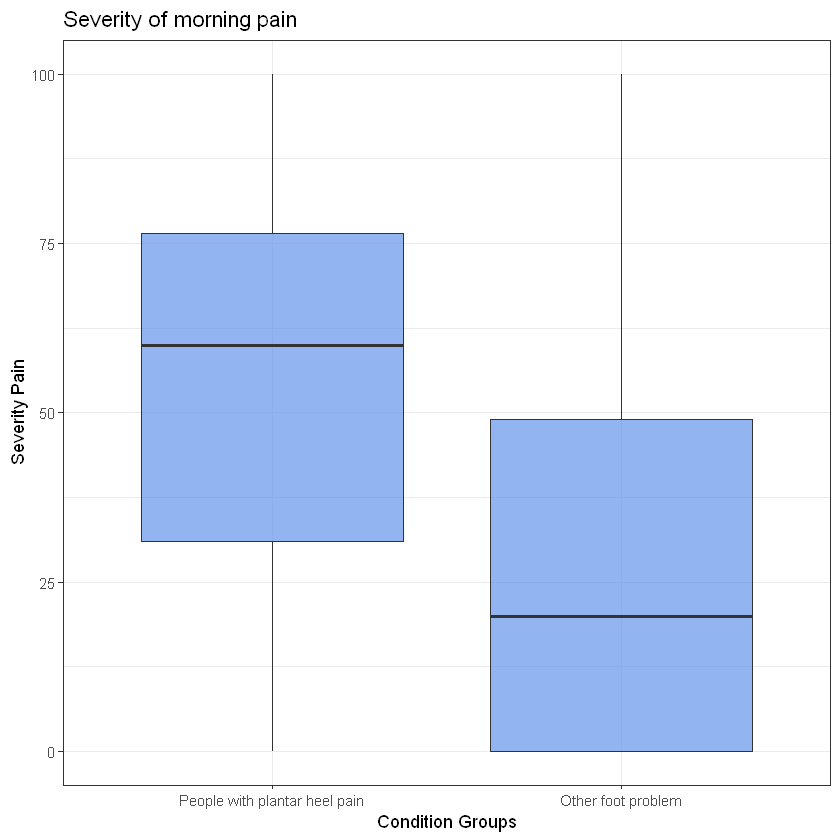

In [77]:
ggplot(dfdata[filter_severitypain,], aes(x = grp, 
                     y = SeverityPain,group=grp)) +
  geom_boxplot( 
               fill = "cornflowerblue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="Severity Pain")+
  labs(title = "Severity of morning pain")+
  scale_x_discrete(limits=c("1","2"),labels = c("People with plantar heel pain", "Other foot problem"))
  

Data shows that average severity of morning pain is more in patients with plantar heel pain than in patients having other foot problems which means people with plantar heel pain feel severe pain in the morning compared to other foot problems group. 	

### Work Participation

In [78]:
#removing missing values.
filter_workpart <- !is.na(dfdata$WorkPart) & dfdata$WorkPart != 2

In [79]:
plotdata <- dfdata[filter_workpart,] %>%
  group_by(grp,WorkPart) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

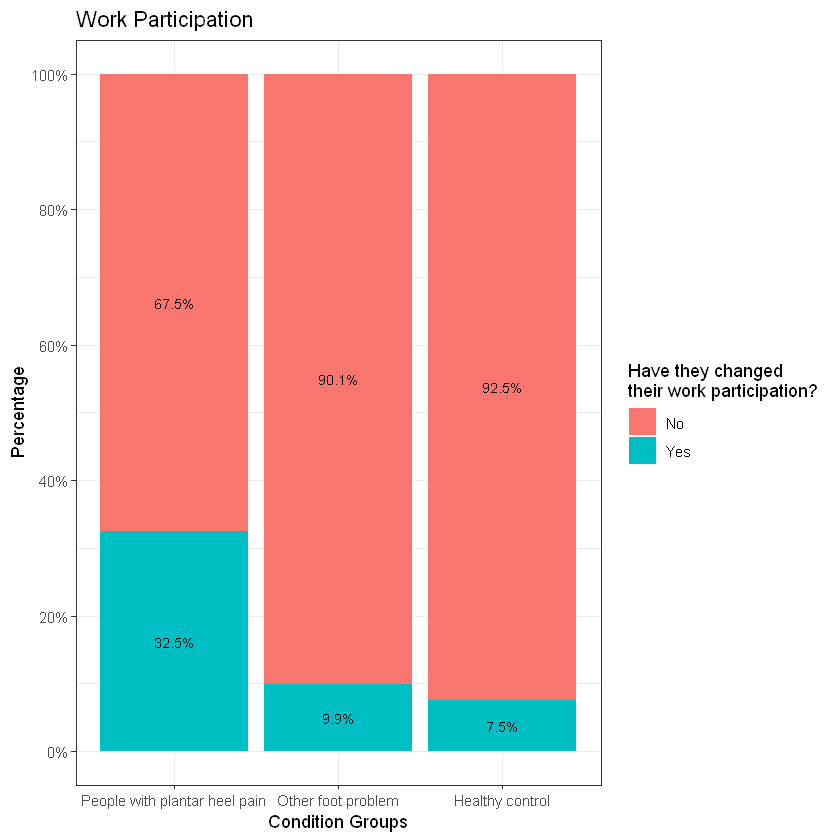

In [80]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(WorkPart))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Work Participation")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Have they changed\ntheir work participation?", labels = c("No","Yes"))

Work participation data shows that there are comparatively more patients in plantar heel pain group than in other group who changed their work participation due to pain in their foot.

### Previous Injury

In [81]:
#remove missing values 
filter_missingvalues <- dfdata$grp != 3 & !is.na(dfdata$PreviousInjury)

In [82]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,PreviousInjury) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

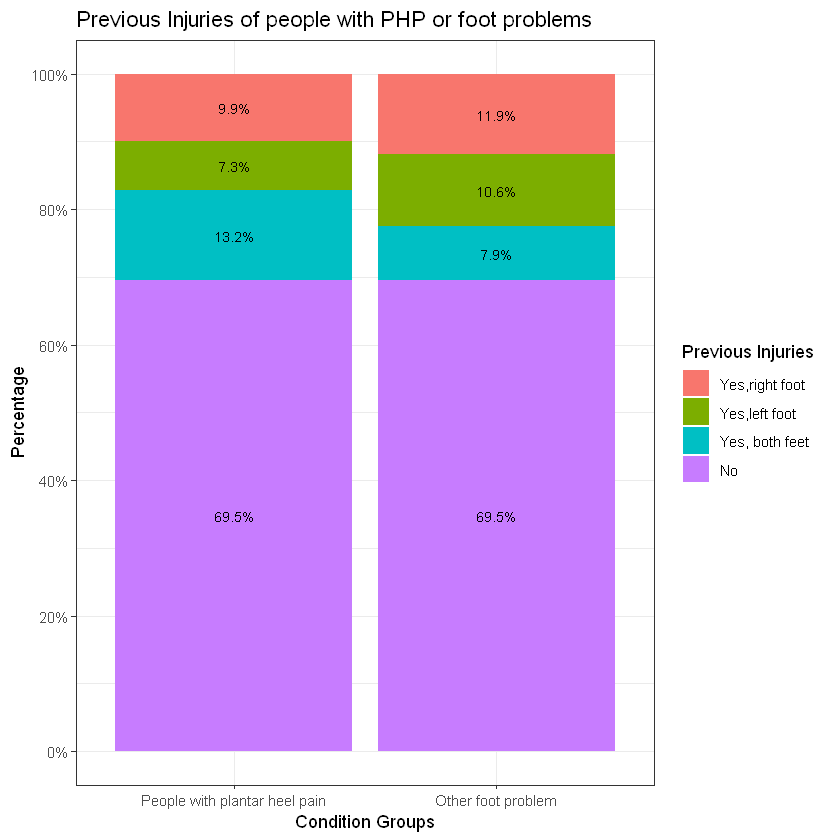

In [83]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(PreviousInjury))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Previous Injuries of people with PHP or foot problems")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2"),labels = c("People with plantar heel pain", "Other foot problem"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Previous Injuries", labels = c("Yes,right foot","Yes,left foot","Yes, both feet","No"))

Previous injury history data shows that most of the patients in plantar heel pain and other foot problem groups didn’t have injuries in their feet before.

### Feeling rested after sleep?

In [84]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$FeelingRested) 

In [85]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,FeelingRested) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

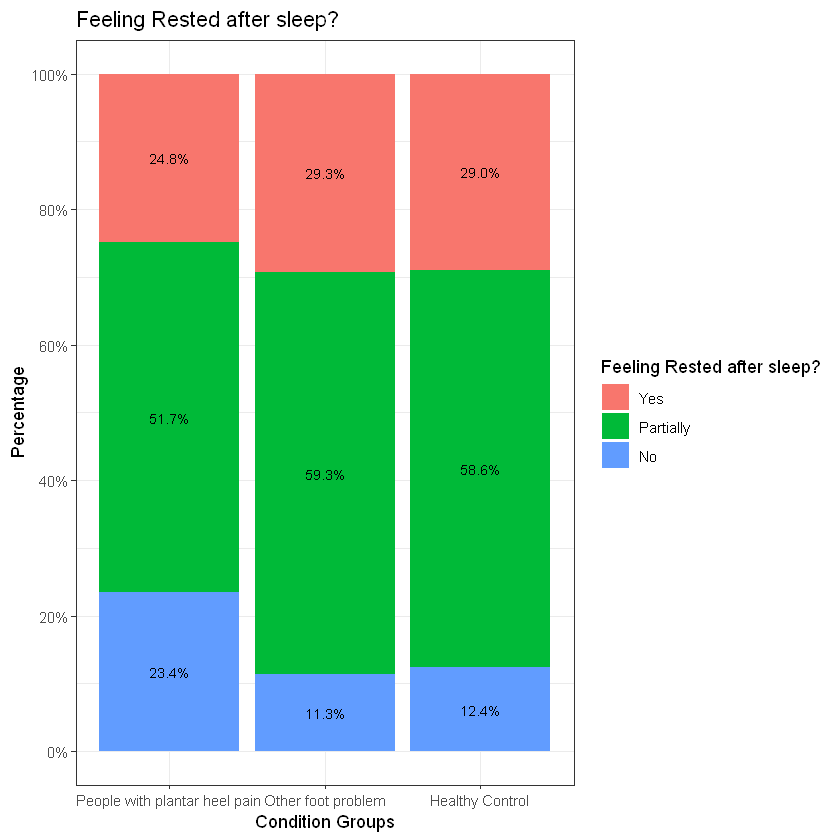

In [86]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(FeelingRested))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Feeling Rested after sleep?")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Feeling Rested after sleep?", labels = c("Yes","Partially","No"))

There is no difference seen in the responses given by patients in all condition groups. However, there are slightly more patients who don’t feel rested after sleeping in plantar heel pain group than in other groups.

### Back Pain

In [87]:
#eliminating missing values
filter_backpain <- !is.na(dfdata$BackP)  

In [88]:
# Convert dfdata to a data.table 
data_backpain <- data.table(dfdata[filter_backpain,]) %>%
  .[grp == 2, grp := 1]

In [89]:
plotdata <- dfdata[filter_backpain,] %>%
  group_by(grp,BackP) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

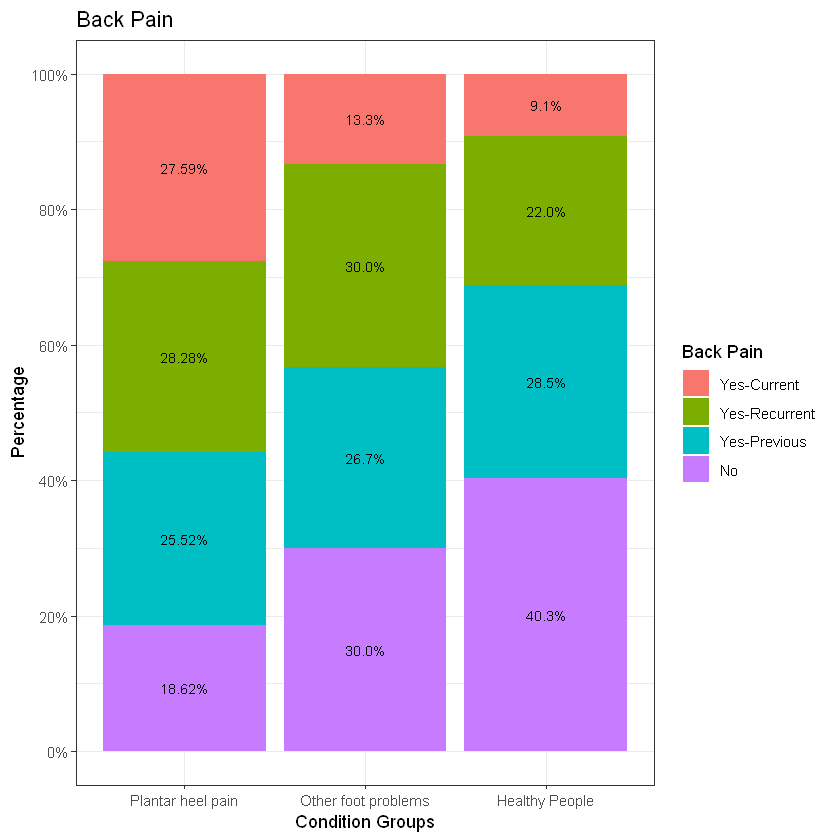

In [90]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(BackP))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Back Pain")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("Plantar heel pain","Other foot problems", "Healthy People"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl),
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Back Pain", labels = c("Yes-Current","Yes-Recurrent","Yes-Previous","No"))

### Back Pain association with foot pain.

In [91]:
#eliminating missing values
filter_backAssoc <- !is.na(dfdata$BackpainL) & dfdata$BackpainL < 2

In [92]:
# Convert dfdata to a data.table 
data_backAssoc <- data.table(dfdata[filter_backAssoc,]) %>%
  .[grp == 2, grp := 1]

In [93]:
plotdata <- dfdata[filter_backAssoc,] %>%
  group_by(grp,BackpainL) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

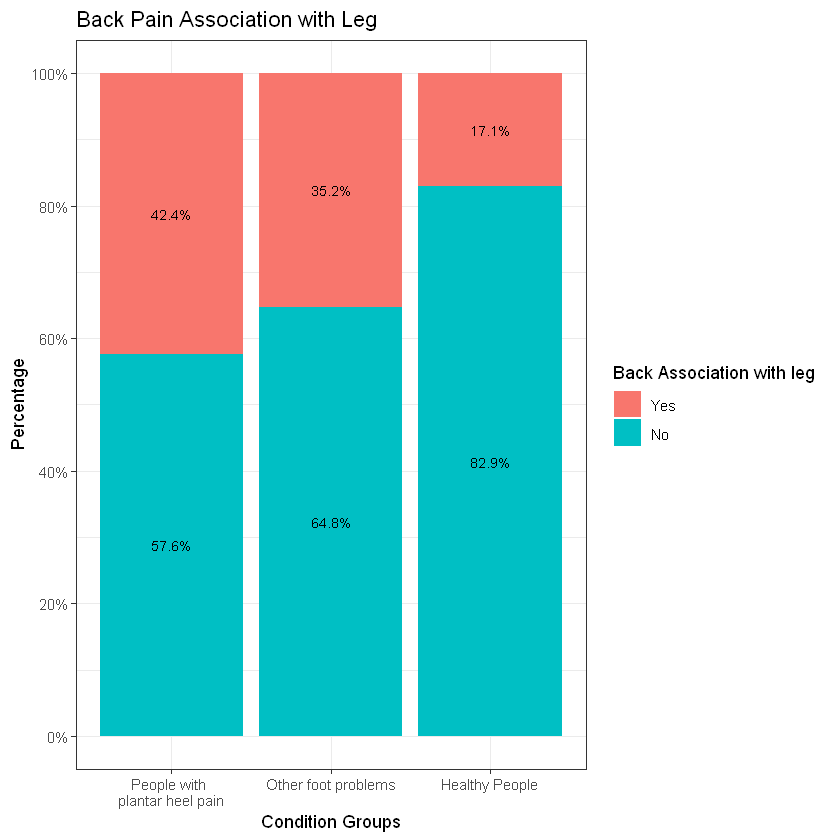

In [94]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(BackpainL))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Back Pain Association with Leg")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with \nplantar heel pain","Other foot problems", "Healthy People"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Back Association with leg", labels = c("Yes","No"))

The responses given by them shows that almost 80% of people having heel pain had previously or currently facing back pain problems and among them 40% are saying that their back pain is associated with their foot pain. Going from plantar heel pain to healthy control group, the ratio of back pain problems in patients decreases and also their back pain is less associated with foot pain.

### Sleep Difficulty

In [95]:
#remove missing values and selecting people with PHP category and other foot problems.
filter_missingvalues <- !is.na(dfdata$SleepDifficulty)

In [96]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,SleepDifficulty) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

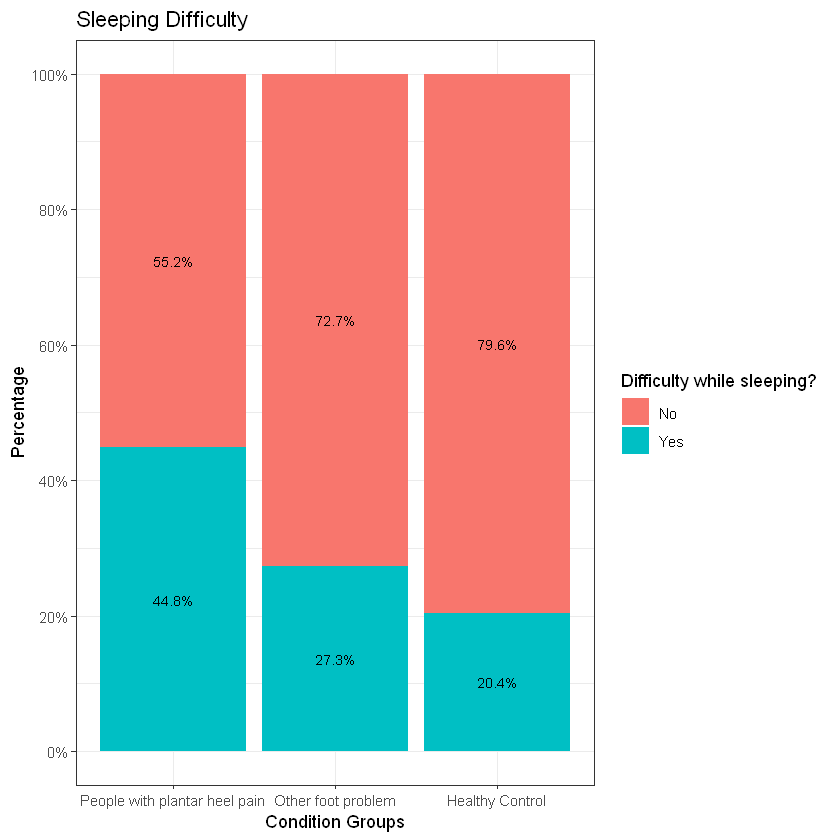

In [97]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(SleepDifficulty))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Sleeping Difficulty")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Difficulty while sleeping?", labels = c("No","Yes"))

Patients where asked if they face difficulty in sleeping. Their responses show that nearly half of the patients having plantar heel pain can’t sleep properly whereas almost equal ratio of patients in other foot problem and control group have difficulty in sleeping and they are very few.

### Reason for sleep difficulty

In [98]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$ReasonSleeDiff) & dfdata$ReasonSleeDiff != 5

In [99]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,ReasonSleeDiff) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

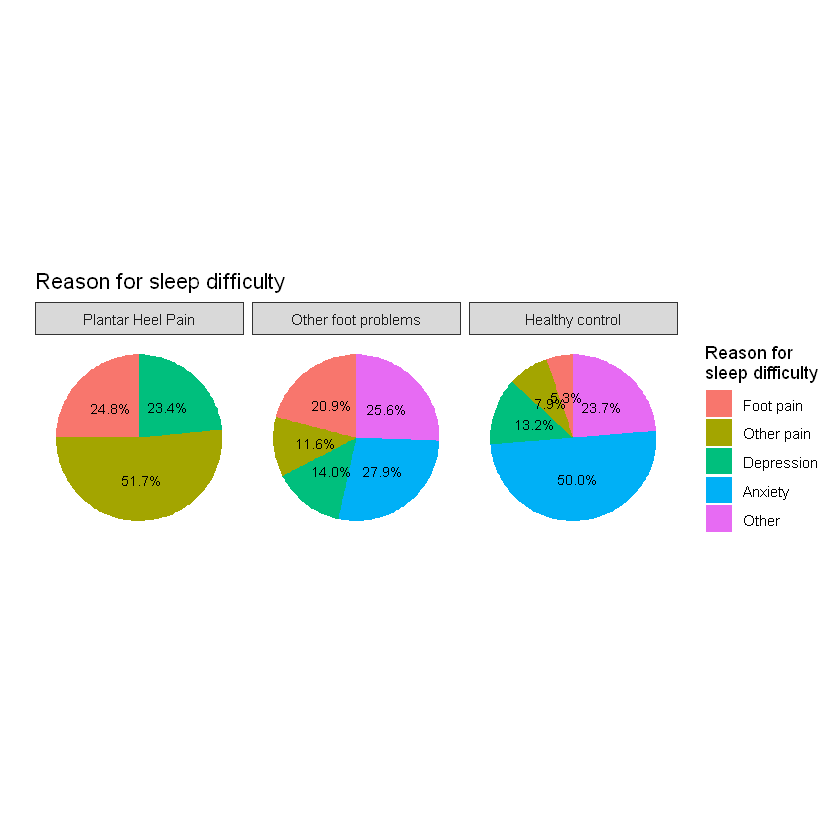

In [100]:
grp_label <- list("Plantar Heel Pain","Other foot problems","Healthy control")

variable_labeller <- function(variable,value){
  return(grp_label[value])
}

ggplot(data=plotdata)+aes(x="",y=pct,fill=as.factor(ReasonSleeDiff))+
    geom_bar(position="fill",stat="identity")+
    ggtitle("Reason for sleep difficulty")+
    coord_polar(theta="y")+
    facet_wrap(~grp,labeller=variable_labeller)+
    theme_bw()+ ylab("")+xlab("")+
    theme(axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank())+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Reason for\nsleep difficulty", labels = c("Foot pain","Other pain","Depression",
                                                                          "Anxiety","Other"))

Data shows that patients with plantar heel pain are not having anxiety issues which is improbable as this might be because patients in the trial are arbitrary. So, we can’t say that patients with anxiety issues are not having plantar heel pain. We need more data to come to a justified conclusion.

### Pain while Sitting or Lying for a while 

In [101]:
#eliminating missing values
filter_sittingpain <- !is.na(dfdata$PainSitting)

In [102]:
plotdata <- dfdata[filter_sittingpain,] %>%
  group_by(grp,PainSitting) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

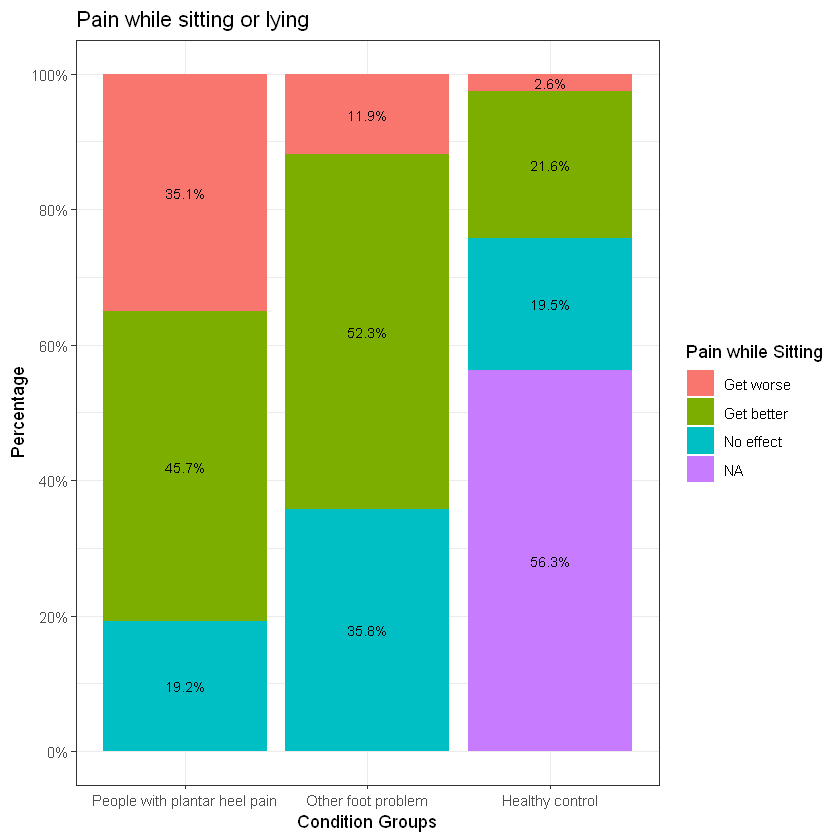

In [103]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(PainSitting))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Pain while sitting or lying")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Pain while Sitting", labels = c("Get worse","Get better","No effect"))

### Pain while walking

In [104]:
#eliminating missing values
filter_walkingpain <- !is.na(dfdata$PainWalking) 

In [105]:
plotdata <- dfdata[filter_walkingpain,] %>%
  group_by(grp,PainWalking) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

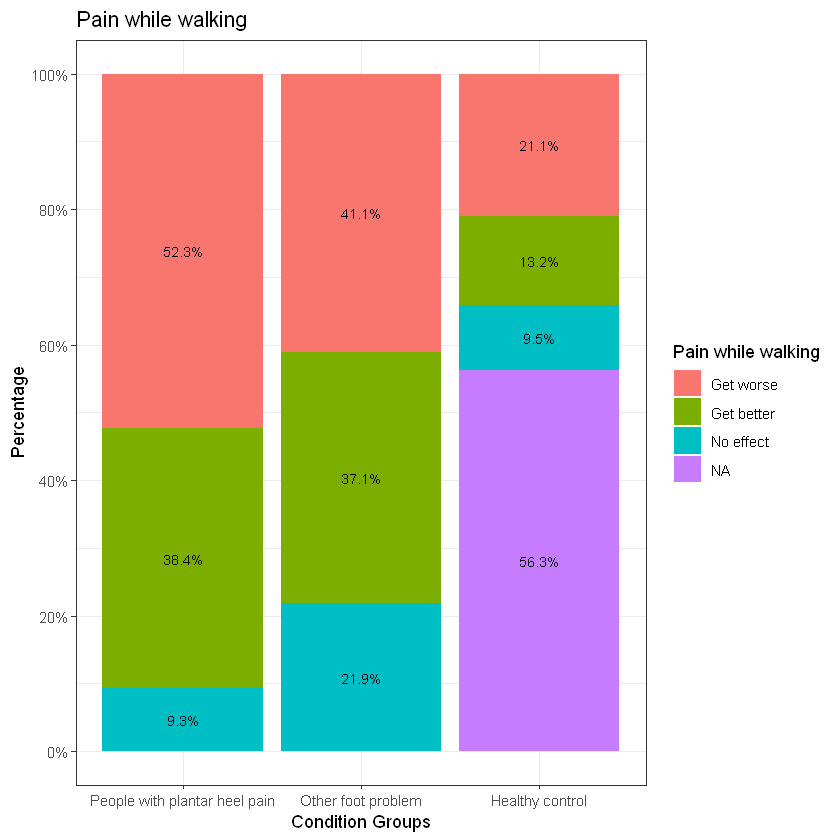

In [106]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(PainWalking))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Pain while walking")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Pain while walking", labels = c("Get worse","Get better","No effect"))

### Pain while standing

In [107]:
#eliminating missing values
filter_standingpain <- !is.na(dfdata$PainStanding)

In [108]:
plotdata <- dfdata[filter_standingpain,] %>%
  group_by(grp,PainStanding) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

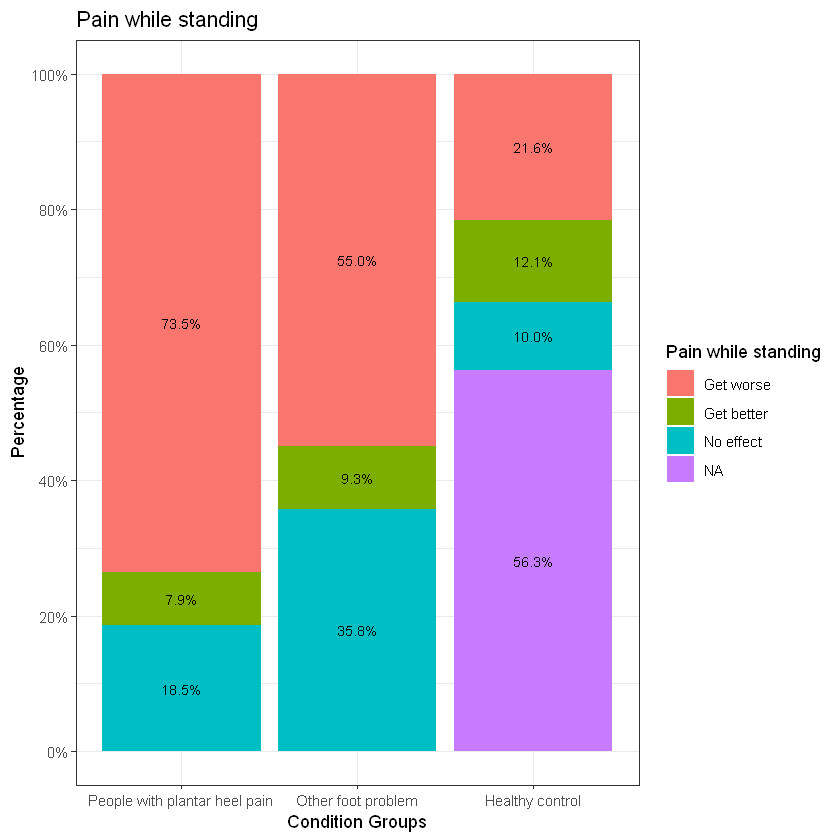

In [109]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(PainStanding))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Pain while standing")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Pain while standing", labels = c("Get worse","Get better","No effect"))

Data shows that patient feels less pain while sitting and pain worsens while standing or walking. This behaviour is same for all the three condition groups. Also, in plantar heel pain group, there are more number of patients whose pain gets worse while sitting compared to other groups.

### Depression

In [110]:
#remove missing values.
filter_missingvalues <- !is.na(dfdata$Depression)

In [111]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,Depression) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

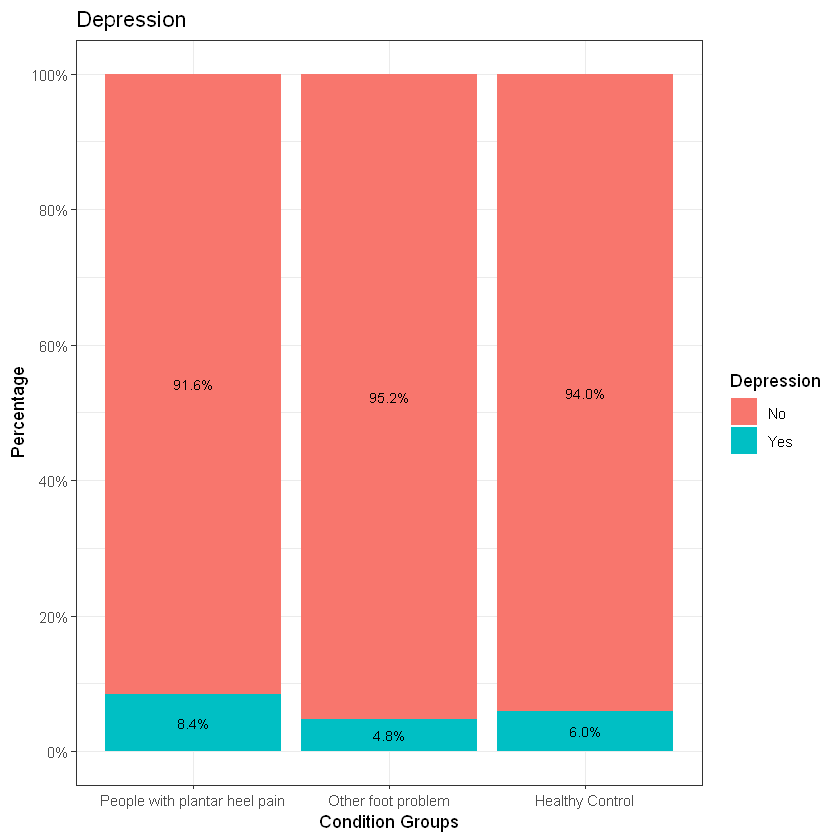

In [112]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(Depression))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Depression")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Depression", labels = c("No","Yes"))

Findings:

Mostly people of all three condition groups are less depressed.

### Condition Prediction

In [113]:
#remove missing values.
filter_missingvalues <- !is.na(dfdata$ConditionPrediction) & dfdata$grp != 3

In [114]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,ConditionPrediction) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

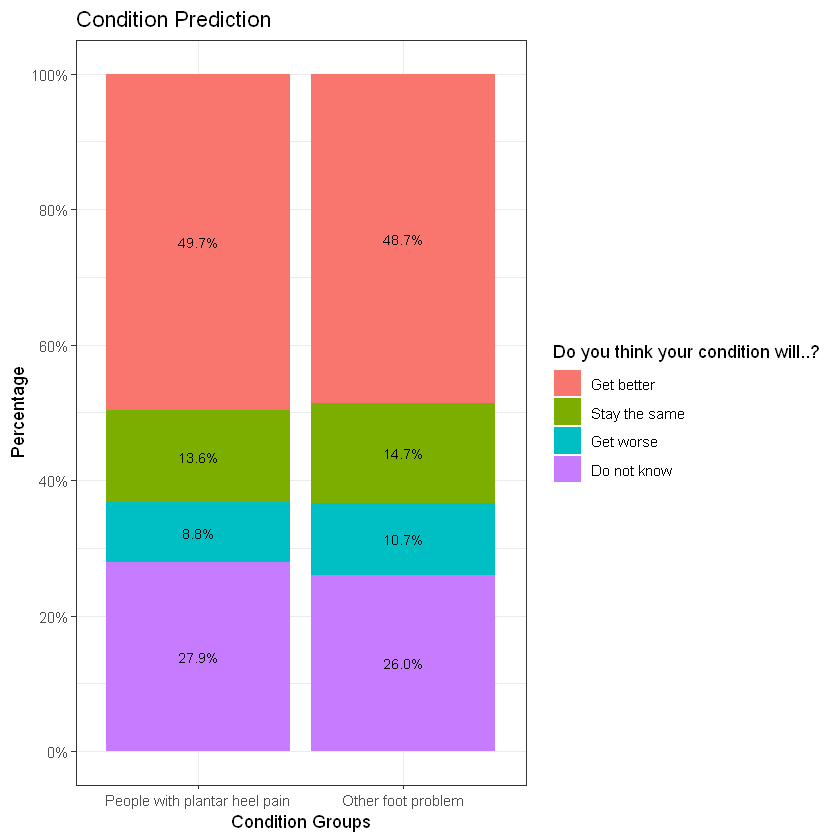

In [115]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(ConditionPrediction))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Condition Prediction")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2"),labels = c("People with plantar heel pain", "Other foot problem"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Do you think your condition will..?", labels = c("Get better", "Stay the same", "Get worse", "Do not know"))

Findings:

Almost similar condition predictions are done by people with planter heel pain and other foot problems.

## D) Scales

### SANE

In [116]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$SANE)

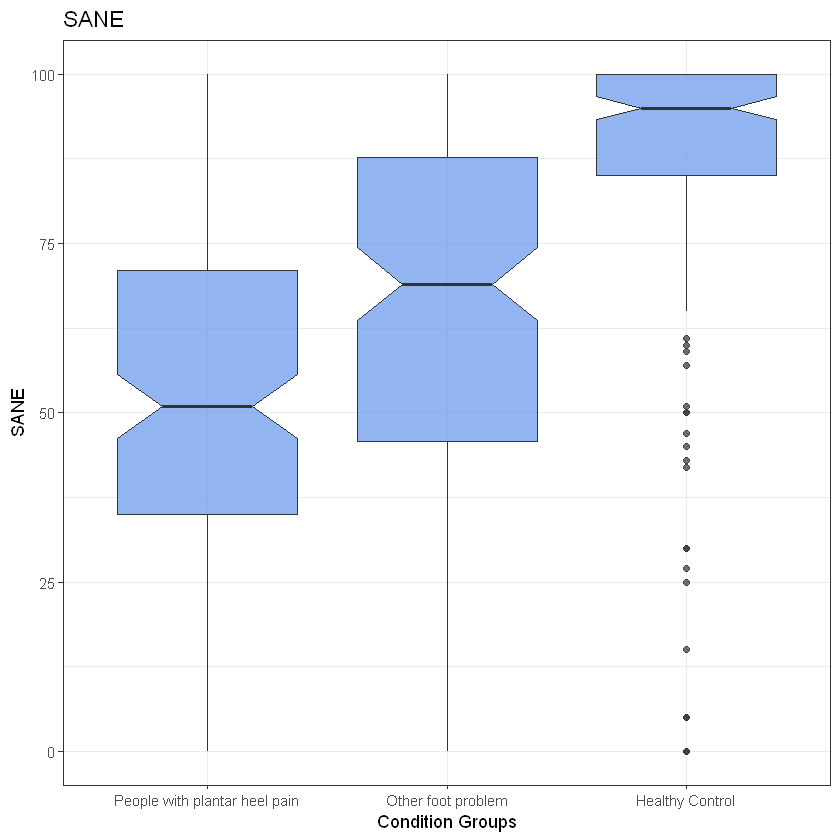

In [117]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = SANE,group=grp)) +
  geom_boxplot(notch = TRUE, 
               fill = "cornflowerblue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="SANE")+
  labs(title = "SANE")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Patients were asked to rate their foot as a percentage of normal (SANE). Figure 10. shows the responses given by them. Here we can see difference in responses given by control group and plantar heel pain group. However, there is overlapping in other foot problem group and plantar heel pain group. On an average, SANE rate of healthy control group is highest and plantar heel pain group is lowest among the groups.

### PASS

In [118]:
#remove missing values and healthy control groups.
filter_missingvalues <- !is.na(dfdata$PASS) & dfdata$grp != 3

In [119]:
plotdata <- dfdata[filter_missingvalues,] %>%
  group_by(grp,PASS) %>%
  summarize(n = n()) %>% 
  mutate(pct = n/sum(n),
         lbl = scales::percent(pct))

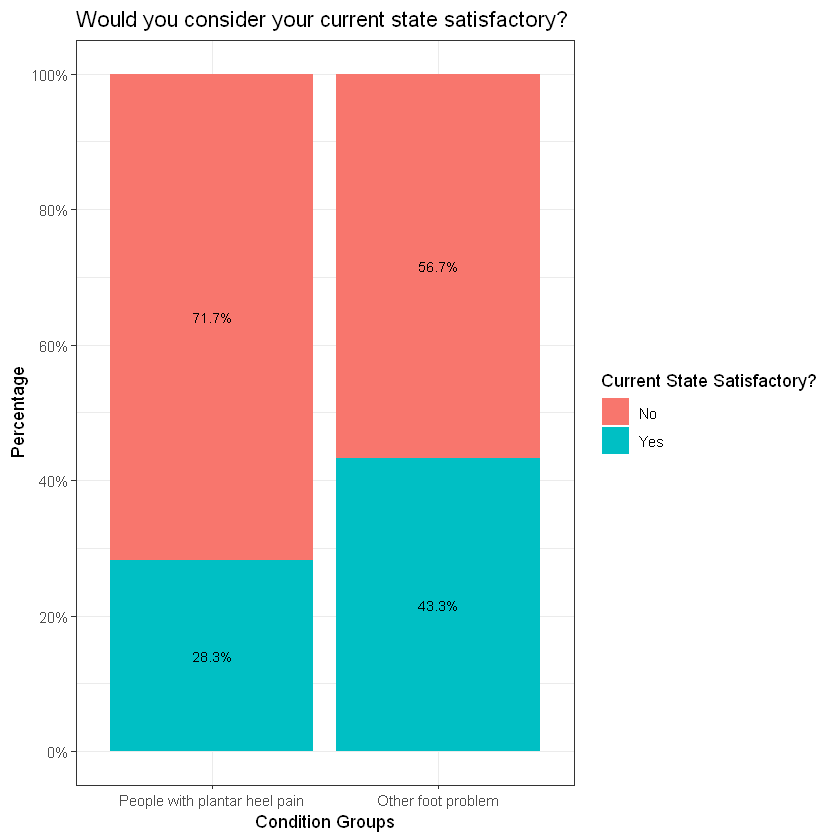

In [120]:
ggplot(data=plotdata,aes(x=grp,y=pct,fill=as.factor(PASS))) + geom_bar(position = "fill",stat = "identity")+
    ggtitle(label="Would you consider your current state satisfactory?")+
    theme_bw()+
    scale_y_continuous(breaks = seq(0, 1, .2), 
                     label = scales::percent)+
    scale_x_discrete(limits=c("1","2"),labels = c("People with plantar heel pain", "Other foot problem"))+
    labs(x="Condition Groups")+
    labs(y="Percentage")+
    geom_text(aes(label = lbl), 
            size = 3, 
            position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Current State Satisfactory?", labels = c("No","Yes"))

During the trial, patients having heel pain or other foot problems were asked if they were to remain same as they are now for the next few months, would they consider their current state to be satisfactory? (PASS). Data shows that there are comparatively a greater number of patients in plantar heel pain group who consider their current to be not satisfactory.

## FHSQ

FHSQ is ranging from 0 to 100. Higher score 100, which indicates better outcome (better foot health/ function/footwear comfort and less pain). The lowest score is 0 and that show the worse outcome in the same way.  

## FHSQ Pain

FHSQ Pain : Evaluation of foot pain in terms of type of pain, severity and duration.

In [121]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$FHSQPain)

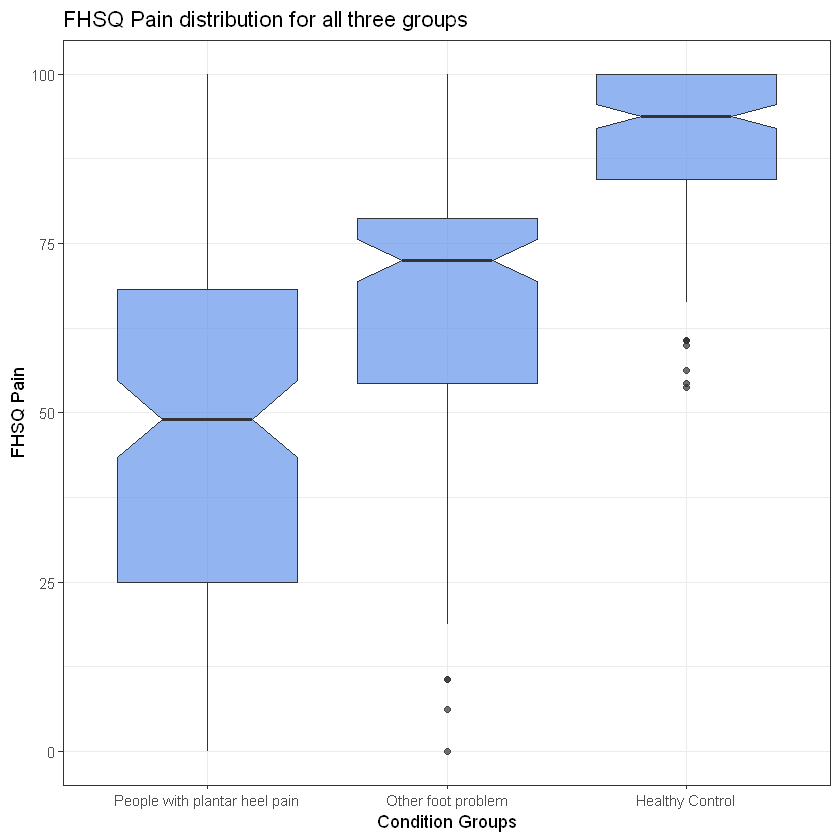

In [122]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = FHSQPain,group=grp)) +
  geom_boxplot(notch = TRUE, 
               fill = "cornflowerblue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="FHSQ Pain")+
  labs(title = "FHSQ Pain distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

## FHSQ Function 

 FHSQ Function : Evaluation of feet in terms of impact on physical function.

In [123]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$FHSQFunction)

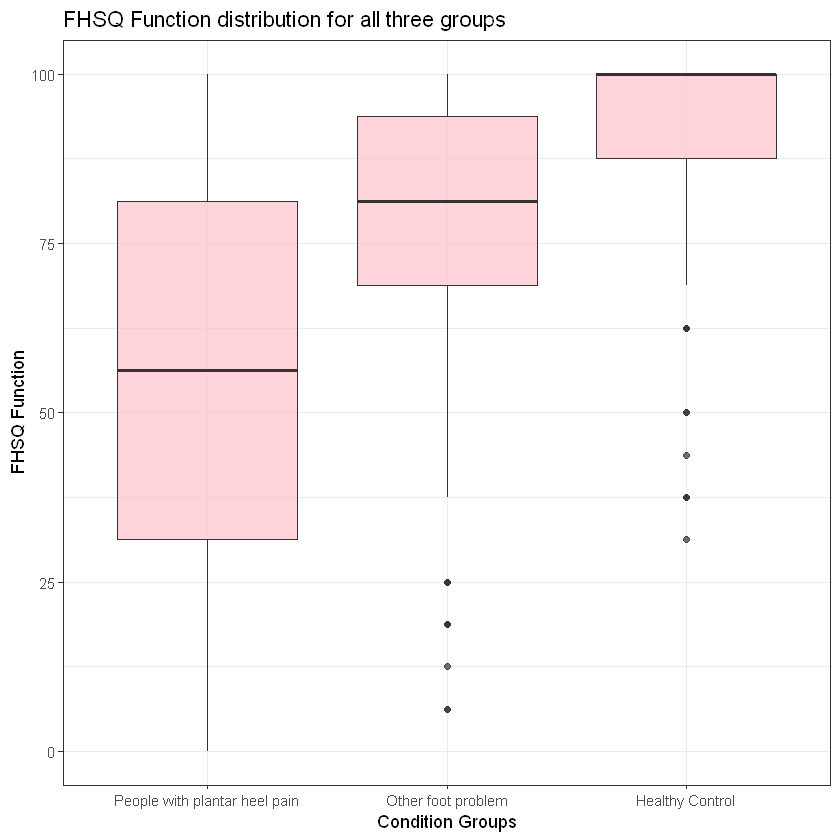

In [124]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = FHSQFunction,group=grp)) +
  geom_boxplot(
               fill = "pink", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="FHSQ Function")+
  labs(title = "FHSQ Function distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

### FHSQ General Foot Health

FHSQ General foot health indicates Self Perception of feet(individual's subjective assessment of body image,related to feet)

In [125]:
#remove missing values 
filter_missingvalues <- !is.na(dfdata$FHSQGeneralFootHealth)

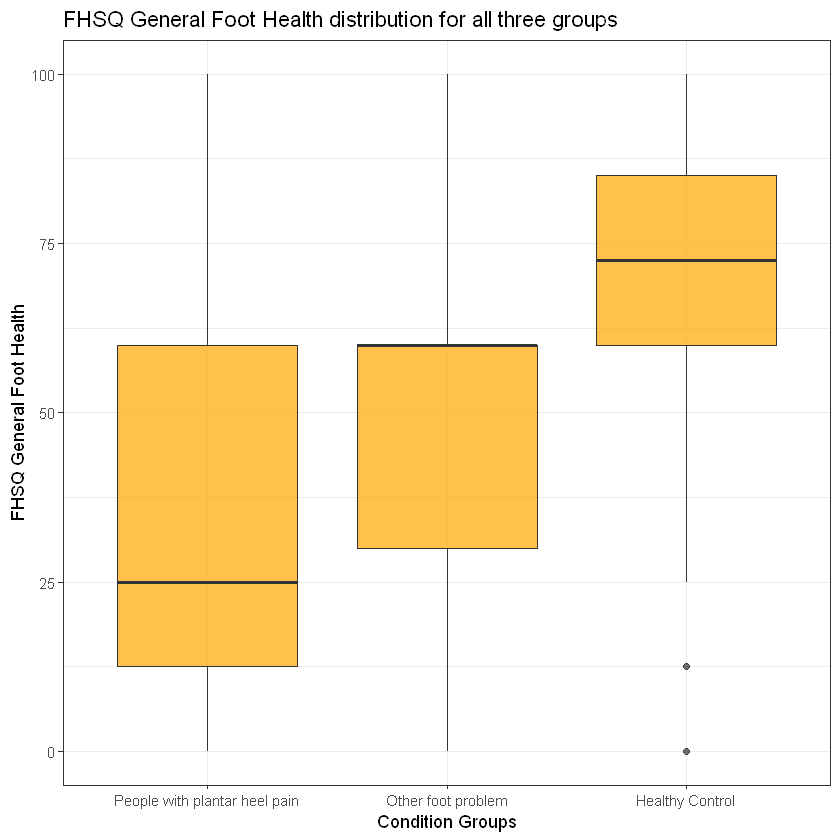

In [126]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = FHSQGeneralFootHealth,group=grp)) +
  geom_boxplot(
               fill = "orange", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="FHSQ General Foot Health")+
  labs(title = "FHSQ General Foot Health distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

### FHSQ Footwear

FHSQ Footwear indicated lifestyle issues related to footwear and feet.

In [127]:
filter_missingvalues <- !is.na(dfdata$FHSQFootwear)

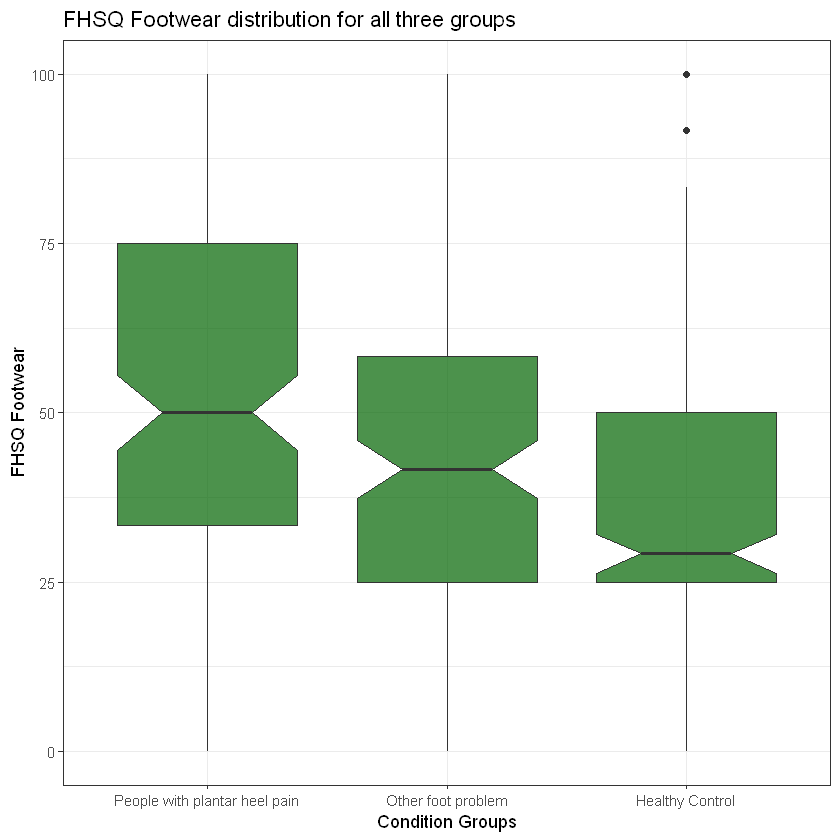

In [128]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = FHSQFootwear,group=grp)) +
  geom_boxplot(notch=TRUE,
               fill = "dark green", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="FHSQ Footwear")+
  labs(title = "FHSQ Footwear distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

FHSQ Pain, Function and General Foot health, median of all condition groups doesn’t overlap with each other, so we can distinguish the three condition groups based on these scales, whereas in FHSQ Footwear, there is some overlapping in plantar heel pain and other foot problem group. Also, we can see that plantar heel pain patients feel more pain, have worst foot function and foot health compared to other groups whereas plantar heel pain patients have comparatively good access to suitable footwears.

### Pain Catastrophization Scale(PCS) 

•	PCS; People are asked to indicate the degree to which they have the above thoughts and feelings when they are experiencing pain using the 0 (not at all) to 4 (all the time) scale. A total score is yielded (ranging from 0-52)(Higher is worse)

In [129]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$pcs)

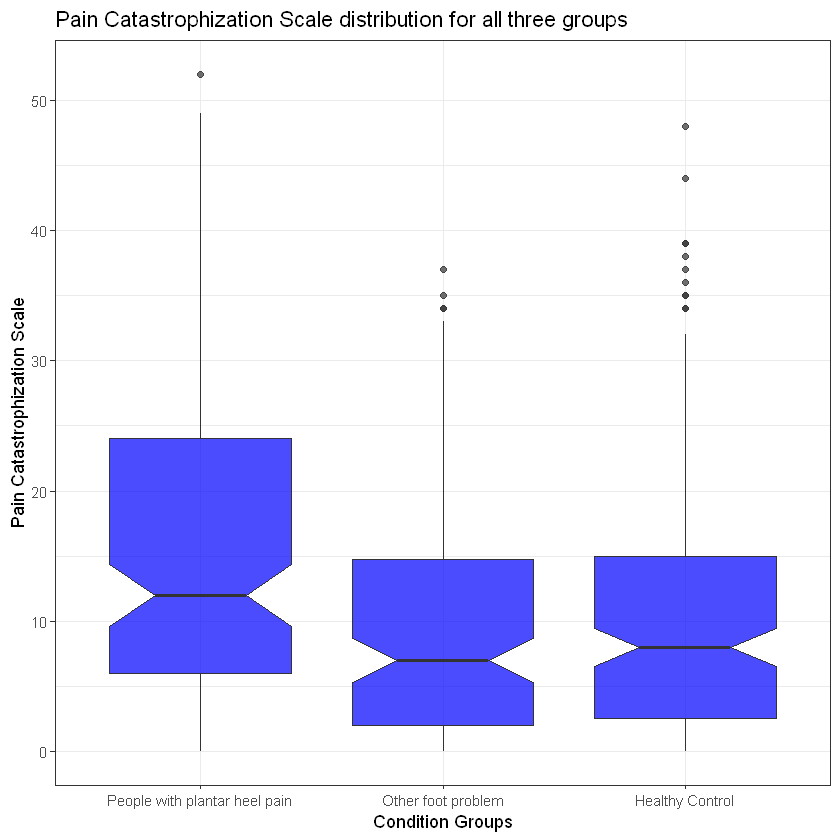

In [130]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = pcs,group=grp)) +
  geom_boxplot(notch=TRUE,
               fill = "blue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="Pain Catastrophization Scale")+
  labs(title = "Pain Catastrophization Scale distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Responses given by patients shows that plantar heel pain group patients say that they are feeling more pain in foot compared to other groups. Other foot problem and control group show similar distribution.

### Fear Avoidance Beliefs Questionnaire (FABQ)

•	FABQ; A higher score indicates more strongly held fear avoidance beliefs. There are two subscales within the FABQ; the work subscale (fw) with 7 questions (maximum score of 42) and the physical activity subscale (fpa) with 4 questions (maximum score of 24).

The FABQ measures patients’ fear of pain and consequent avoidance of physical activity because of their fear

### FPA(Physical activity subscale) 

In [131]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$fpa)

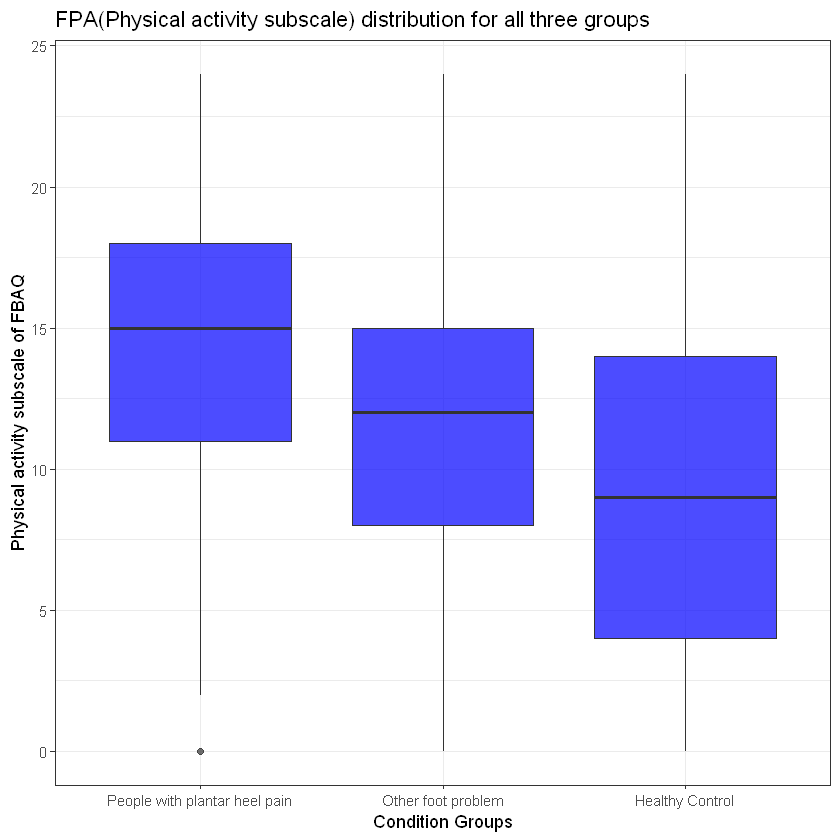

In [132]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = fpa,group=grp)) +
  geom_boxplot(
               fill = "blue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="Physical activity subscale of FBAQ")+
  labs(title = "FPA(Physical activity subscale) distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

### Work Subscale(fw) 

In [133]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$fw)

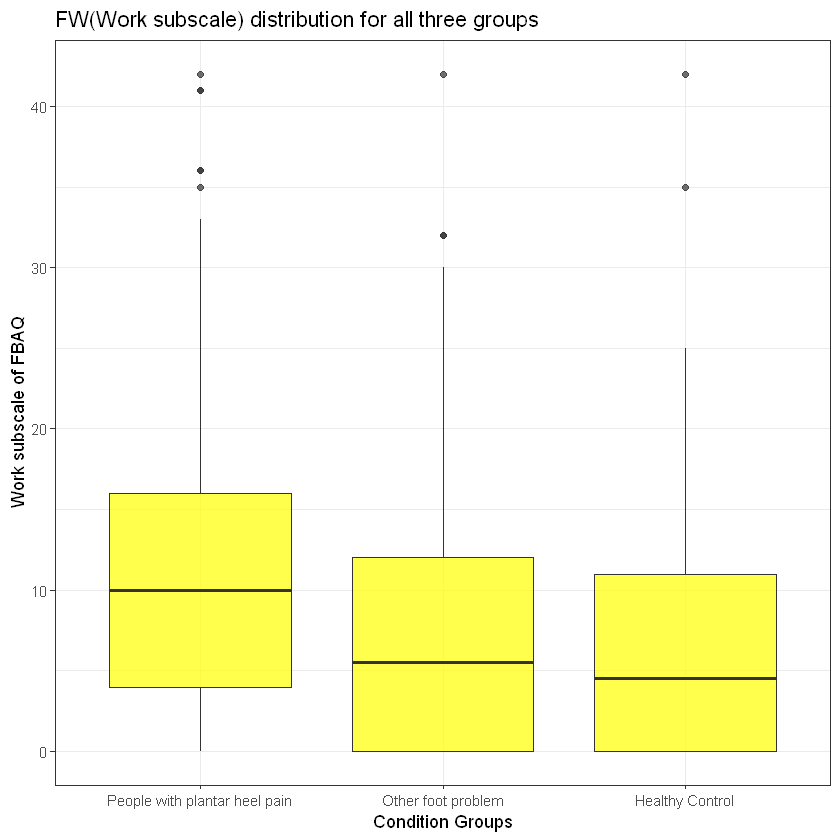

In [134]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = fw,group=grp)) +
  geom_boxplot(
               fill = "yellow", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="Work subscale of FBAQ")+
  labs(title = "FW(Work subscale) distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Data shows that plantar heel pain patients have more fear and avoid physical activities more compared to other groups. Similar distribution is seen in plantar heel pain and other foot problem groups.

### Central Sensitization of Inventory (CSI) 

•	CSI; the total score is ranging from 0-100. A score of more than 40 indicates the presence of central sensitisation

The Central Sensitisation Inventory (CSI) is a self-report outcome measure designed to identify patients who have symptoms that may be related to central sensitisation (CS) or central sensitivity syndromes (CSS) such as fibromyalgia, neck injury, temporomandibular joint disorder or migraine/tension headaches

In [135]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$csi)

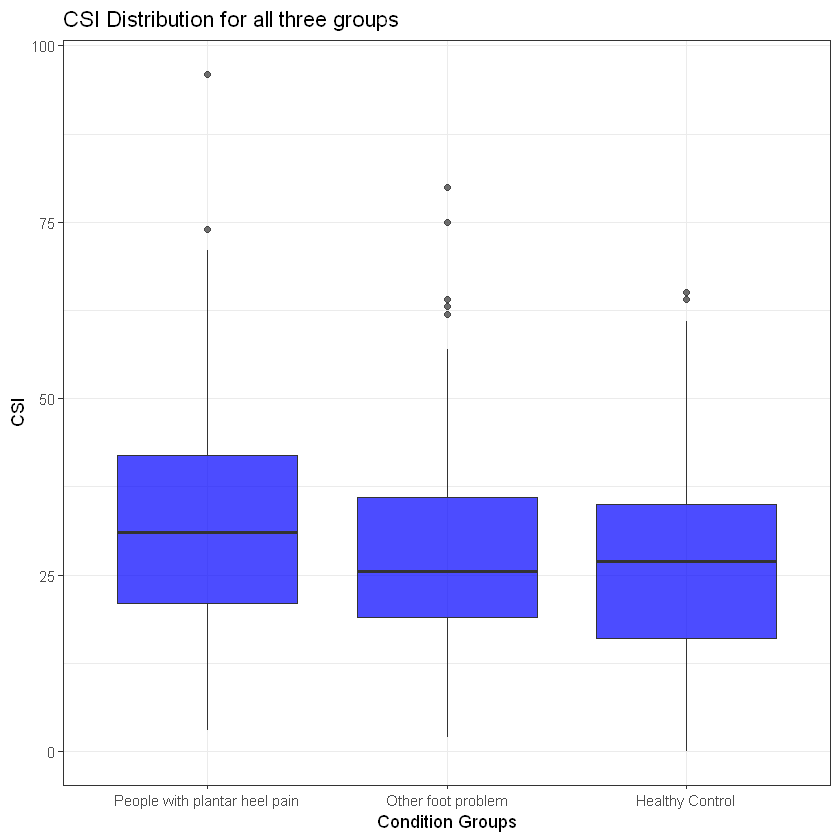

In [136]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = csi,group=grp)) +
  geom_boxplot(
               fill = "blue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="CSI")+
  labs(title = "CSI Distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Data shows that there are more patients in plantar heel pain having central sensitisation compared to other groups.

### ED5D5L Index (General Health Status Questionnaire in 5 Dimension)

•	EQ5D5L-index; 5 dimension are Mobility, Self-care, usual activities, pain/discomfort, anxiety/depression. The index is calculated by deducting the appropriate weights from 1, the value for full health (i.e. state 11111).

The UI ranges from −0.208 (worst possible health) to 1.000 (best possible health).

In [137]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$eq5d5li)

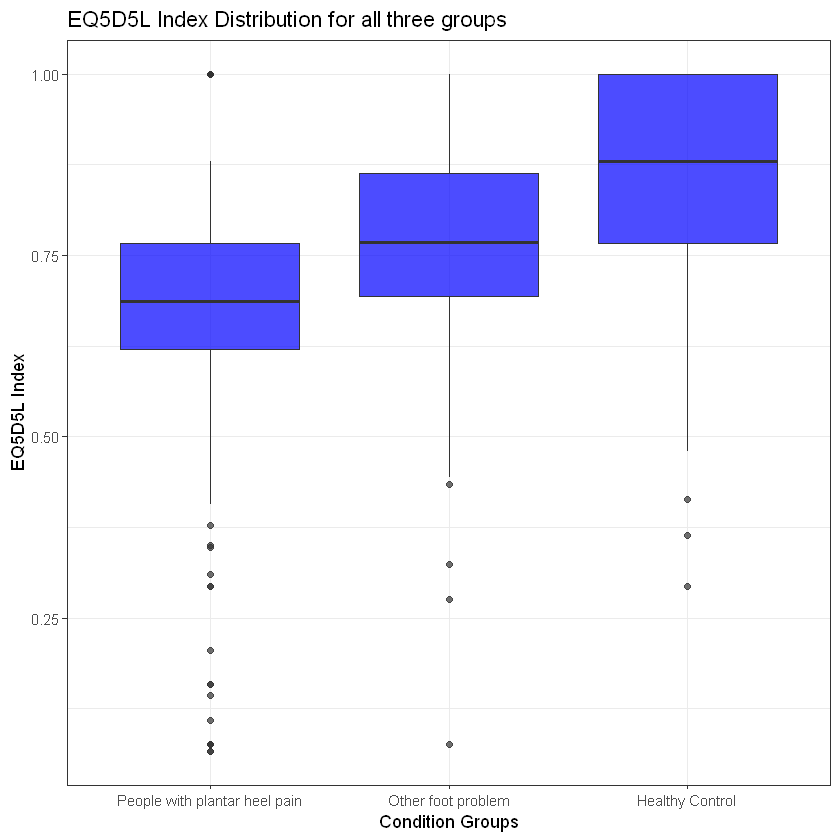

In [138]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = eq5d5li,group=grp)) +
  geom_boxplot(
               fill = "blue", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="EQ5D5L Index")+
  labs(title = "EQ5D5L Index Distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Responses given by patients in all condition groups shows that control group has good health whereas plantar heel pain group has worst health among the three condition groups.

### eHealth 

eHealth scale ranges from 8 to 40 . Higher is better

In [139]:
#eliminating missing values
filter_missingvalues <- !is.na(dfdata$eHealth)

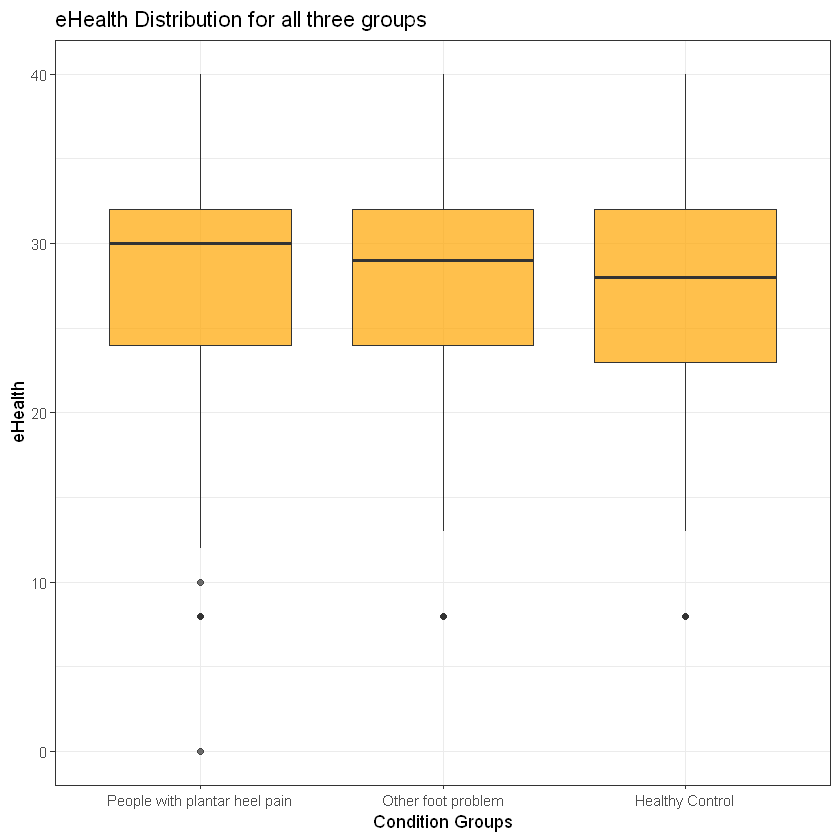

In [140]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = eHealth,group=grp)) +
  geom_boxplot(
               fill = "orange", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="eHealth")+
  labs(title = "eHealth Distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Findings:

Almost similar average eHealth scale and range for all the three groups.

People with PHP have more eHealth scale ranging from 25 to 30.

People with no foot problems have equal distribution of eHealth scale.

### Global Physical Activity Questionaire (GPA)

The Global Physical Activity Questionnaire was developed by WHO for
physical activity surveillance in countries. It collects information on physical
activity participation in three settings (or domains) as well as sedentary
behaviour, comprising 16 questions (P1-P16). The domains are:
• Activity at work
• Travel to and from places
• Recreational activities 

Higher value means more physically active they are.

In [141]:
filter_missingvalues <- !is.na(dfdata$gpa)

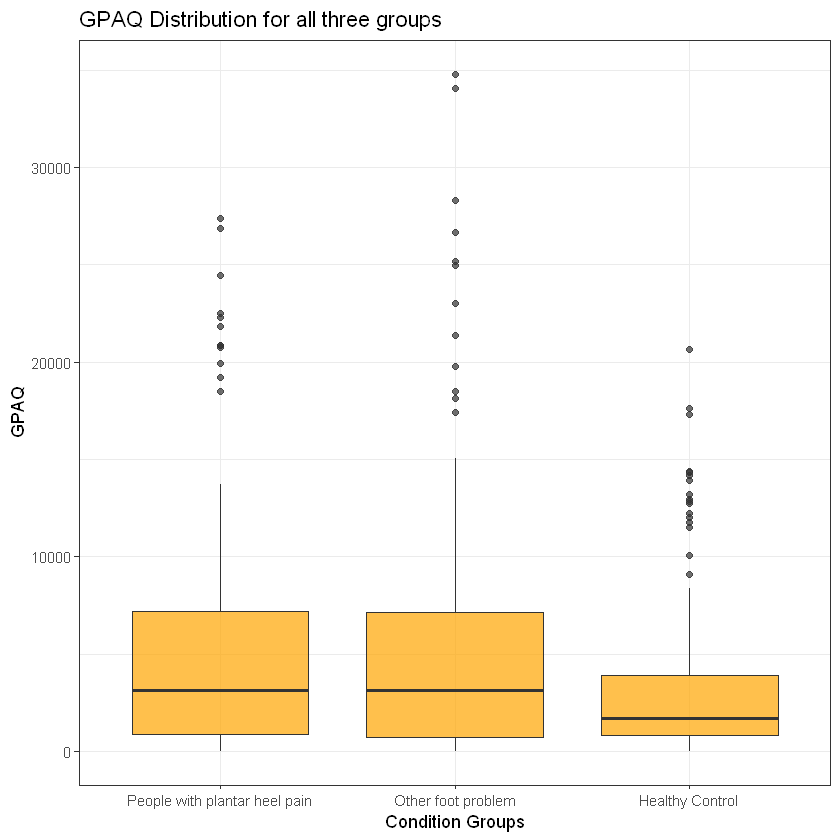

In [142]:
ggplot(dfdata[filter_missingvalues,], aes(x = grp, 
                     y = gpa,group=grp)) +
  geom_boxplot(
               fill = "orange", 
               alpha = .7) +
  theme_bw()+
  labs(x="Condition Groups")+
  labs(y="GPAQ")+
  labs(title = "GPAQ Distribution for all three groups")+
  scale_x_discrete(limits=c("1","2","3"),labels = c("People with plantar heel pain", "Other foot problem","Healthy Control"))

Data shows similar distribution of plantar heel pain and other foot problem groups. Control group has lower median which means they are less physically active.

# Random Forest Algorithm

Here we will solve classification problem for two condition groups i.e 'Planter Heel Pain' and 'Other foot problem' 

In [533]:
install.packages("caret")

also installing the dependencies 'pillar', 'glue', 'tibble', 'ellipsis', 'rlang', 'dplyr', 'tidyselect', 'vctrs', 'lifecycle', 'tidyr', 'ModelMetrics', 'recipes', 'pROC'



package 'pillar' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp42S2PO\downloaded_packages


In [538]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies 'mlbench', 'SparseM', 'slam'



package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmp42S2PO\downloaded_packages


In [143]:
library(caret)

Loading required package: lattice


In [63]:
install.packages('MLeval')

package 'MLeval' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\RtmpuKDQvD\downloaded_packages


In [144]:
library(MLeval)

In [145]:
#selecting samples of 2 condition groups:- 'Planter Heel Pain' and 'Other foot problem'
df_test = dfdata[dfdata$grp!='3',]

In [146]:
df_test <- droplevels(df_test)

In [147]:
#for classification of Planter heel pain and other foot problem patients.
#exluding demographics data.
df = subset(df_test, select = -c(g,age,Ethinicty,OccupationClass,Education))

In [148]:
colSums(is.na(df))

grp                   bmi            TimeOnFeet 
                    0                     0                     0 
      SportsCondition           MorningPain                MornPD 
                    0                    18                    18 
         SeverityPain        PreviousInjury     OtherTendinopathy 
                   18                    18                    25 
                BackP             BackpainL                  Work 
                   25                    25                    25 
             FHSQPain          FHSQFunction FHSQGeneralFootHealth 
                   27                    27                    27 
         FHSQFootwear                   gpa                   pcs 
                   27                    57                    37 
                  fpa                    fw                   csi 
                   37                    37                    37 
              eq5d5li               eq5d5lv                DomLeg 
                   31                    31                     0 
        LevelOfSports          YearofSports          EffectedSide 
                    0                    15                     6 
                Onset           PainSitting           PainWalking 
                    5                    18                    18 
         PainStanding              WorkPart   ConditionPrediction 
                   18                    18                    23 
            Menopause            HormoneThe         SleepDuration 
                   25                    25                    25 
      SleepDifficulty        ReasonSleeDiff         FeelingRested 
                   25                    25                    25 
              Smoking                  PASS                  SANE 
                   25                    25                    25 
             Footwear           Comorbities        NumofComorbity 
                   30                    30                    30 
           Depression               eHealth 
                   30                    24

In [149]:
mean(is.na(df))

[1] 0.06894947

In [150]:
#remove rows with missing values
df <- na.omit(df)

In [151]:
print('Dimension of dataset')
dim(df)

[1] "Dimension of dataset"


[1] 241  47

In [152]:
# 10-Fold cross validation
ctrl <- trainControl(method="cv", 
                    number=10,
                    search="grid",savePredictions = T,classProbs=T,summaryFunction=twoClassSummary)

In [153]:
#converts level names of grp variable i.e('1' , '2') to valid level names i.e ('X1' , 'X2')
df$grp <- as.factor(df$grp)
df <- df %>% 
  mutate(grp = factor(grp, 
                        labels = make.names(levels(grp))))

In [154]:
set.seed(1234)
rfFit <- train(grp ~ ., data=df, 
               method="rf", metric="Accuracy",
               preProc=c("center", "scale"),
               trControl=ctrl)

In [155]:
rfFit

Random Forest 

241 samples
 46 predictor
  2 classes: 'X1', 'X2' 

Pre-processing: centered (46), scaled (46) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 217, 217, 216, 216, 217, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.9652681  0.9227273  0.8897436
  24    0.9673223  0.9818182  0.8660256
  46    0.9590375  0.9643939  0.8660256

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 24.

In [156]:
max(rfFit$results$ROC)

[1] 0.9673223

***MLeval: Machine Learning Model Evaluation***
Input: caret train function object
Not averaging probs.
Group 1 type: cv
Observations: 241
Number of groups: 1
Observations per group: 241
Positive: X2
Negative: X1
Group: Group 1
Positive: 127
Negative: 114
***Performance Metrics***


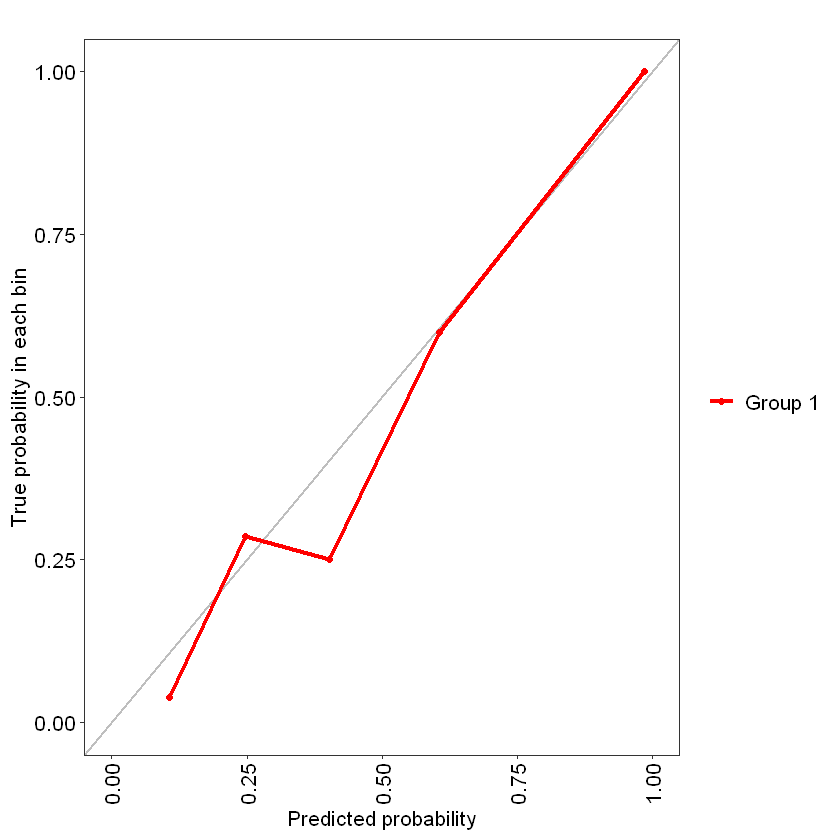

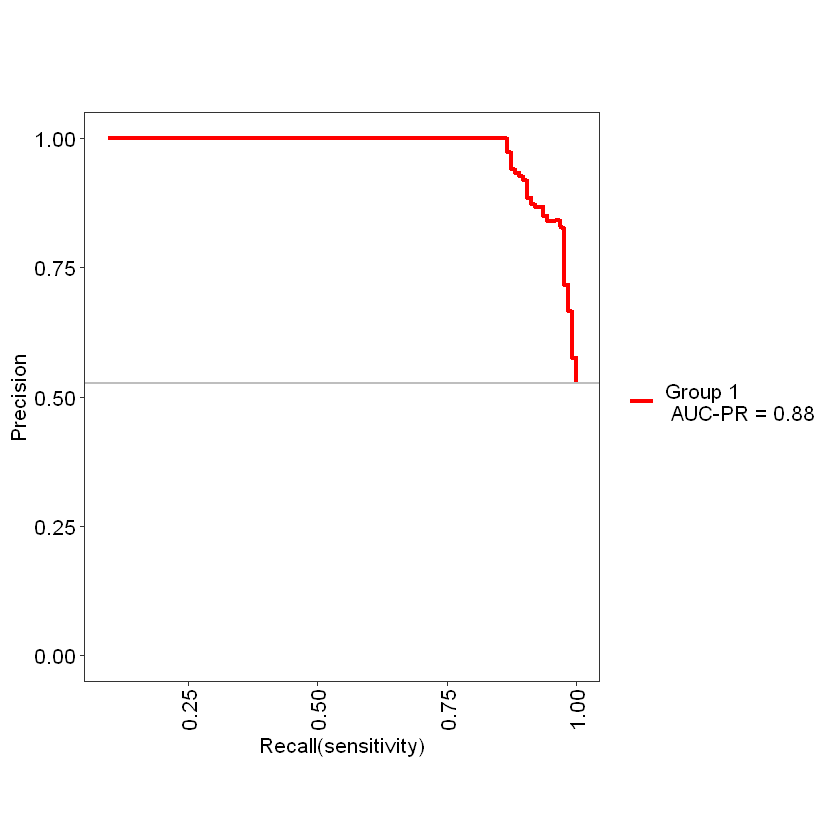

Group 1 Optimal Informedness = 0.866141732283465
Group 1 AUC-ROC = 0.97


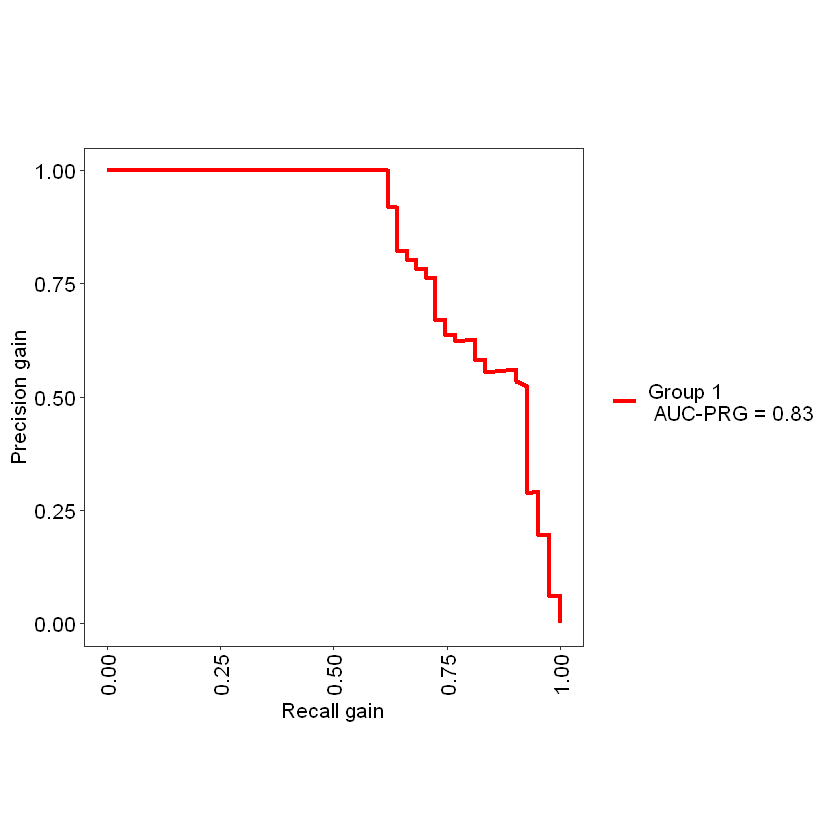

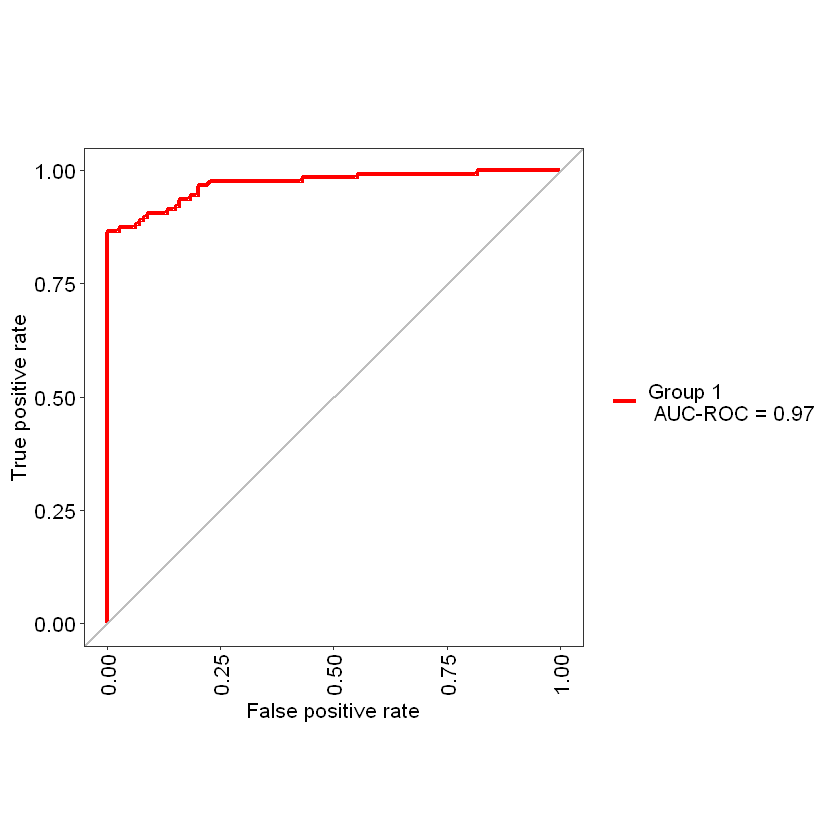

In [157]:
res <- evalm(rfFit)

### Applying random forest on top 10 features only.

In [158]:
varImp(rfFit)

rf variable importance

  only 20 most important variables shown (out of 46)

                Overall
ReasonSleeDiff  100.000
Comorbities      12.815
Onset             5.306
SeverityPain      4.463
FHSQPain          3.971
FHSQFunction      3.827
fpa               3.288
csi               3.142
SleepDifficulty   3.085
MorningPain       2.290
pcs               2.180
SANE              2.068
TimeOnFeet        1.786
gpa               1.717
DomLeg            1.691
eq5d5lv           1.307
FHSQFootwear      1.253
eq5d5li           1.209
eHealth           1.163
Smoking           1.091

In [159]:
#selecting top 10 features.
set.seed(1234)
rfFit_top10 <- train(grp ~ ReasonSleeDiff+Comorbities+Onset+SeverityPain+FHSQPain+FHSQFunction+fpa+csi+SleepDifficulty+MorningPain, 
               data=df, 
               method="rf", metric="Accuracy", 
               trControl=ctrl)

In [160]:
rfFit_top10

Random Forest 

241 samples
 10 predictor
  2 classes: 'X1', 'X2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 217, 217, 216, 216, 217, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.9797494  0.9833333  0.9057692
   6    0.9865530  0.9742424  0.8974359
  10    0.9809149  0.9734848  0.8967949

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.

In [161]:
max(rfFit_top10$results$ROC)

[1] 0.986553

***MLeval: Machine Learning Model Evaluation***
Input: caret train function object
Not averaging probs.
Group 1 type: cv
Observations: 241
Number of groups: 1
Observations per group: 241
Positive: X2
Negative: X1
Group: Group 1
Positive: 127
Negative: 114
***Performance Metrics***


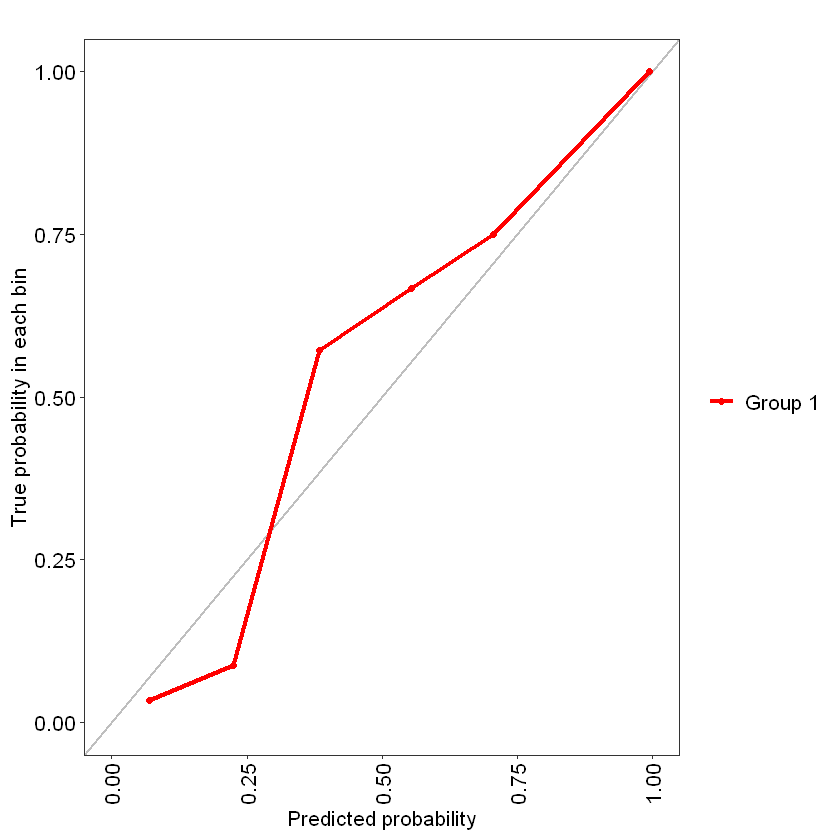

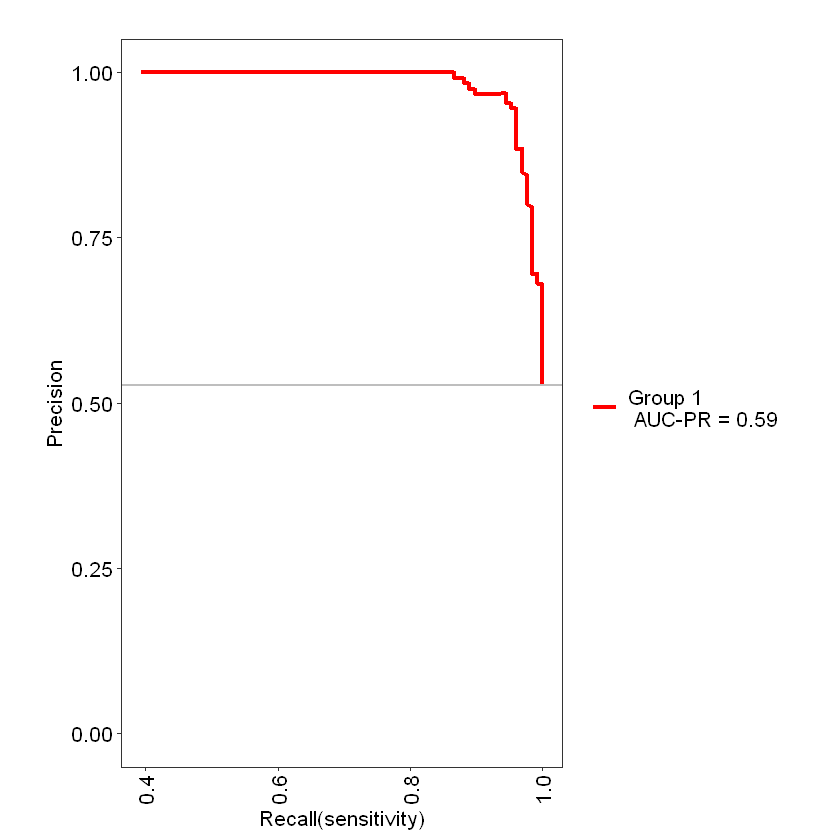

Group 1 Optimal Informedness = 0.909794170465534
Group 1 AUC-ROC = 0.98


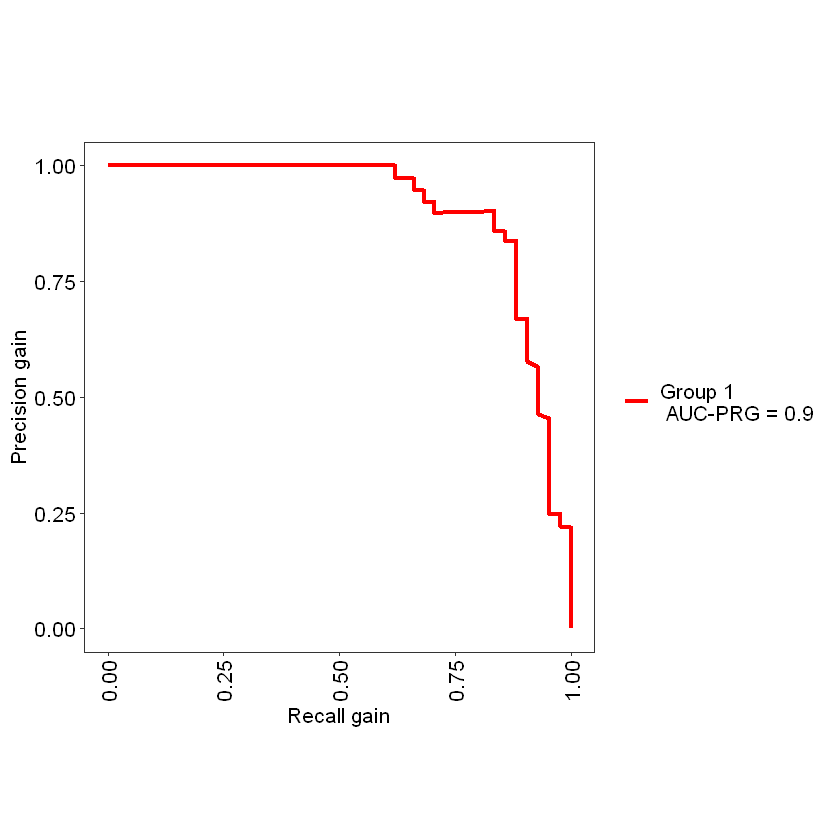

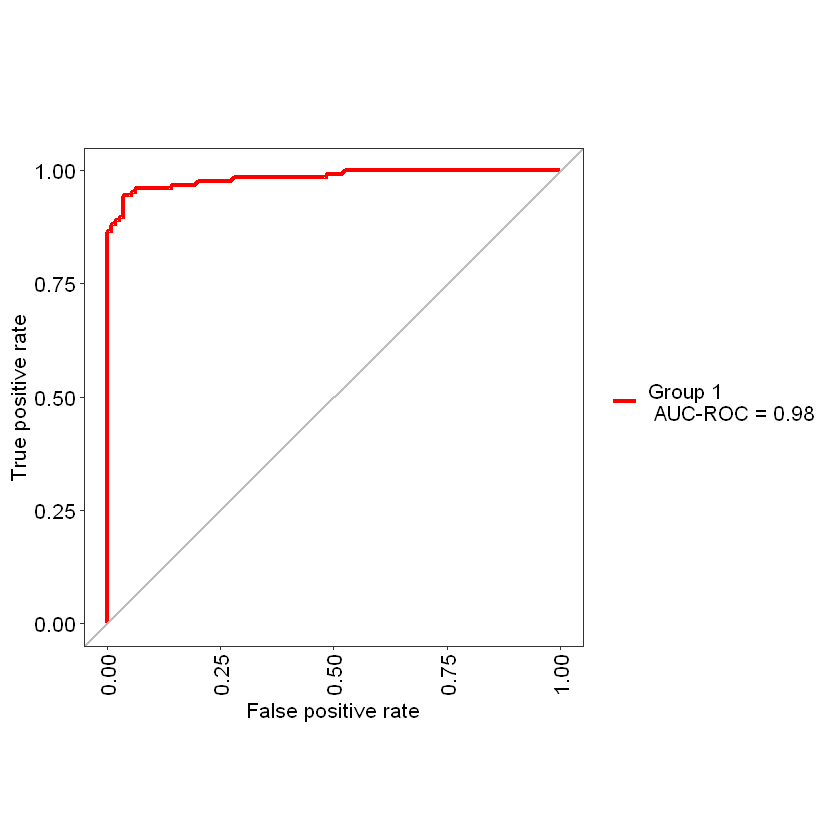

In [162]:
res <- evalm(rfFit_top10)

### Excluding ReasonSleeDiff, Onset and Comorbities features from the dataset

In [163]:
df = subset(df, select = -c(ReasonSleeDiff,Comorbities,Onset))

In [164]:
set.seed(1234)
rfFit <- train(grp ~ ., data=df, 
               method="rf", metric="Accuracy",
               preProc=c("center", "scale"),
               trControl=ctrl)

In [165]:
rfFit

Random Forest 

241 samples
 43 predictor
  2 classes: 'X1', 'X2' 

Pre-processing: centered (43), scaled (43) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 217, 217, 216, 216, 217, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.7884543  0.6325758  0.8282051
  22    0.7949835  0.6856061  0.7333333
  43    0.7791327  0.7113636  0.6871795

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 22.

In [166]:
max(rfFit$results$ROC)

[1] 0.7949835

***MLeval: Machine Learning Model Evaluation***
Input: caret train function object
Not averaging probs.
Group 1 type: cv
Observations: 241
Number of groups: 1
Observations per group: 241
Positive: X2
Negative: X1
Group: Group 1
Positive: 127
Negative: 114
***Performance Metrics***


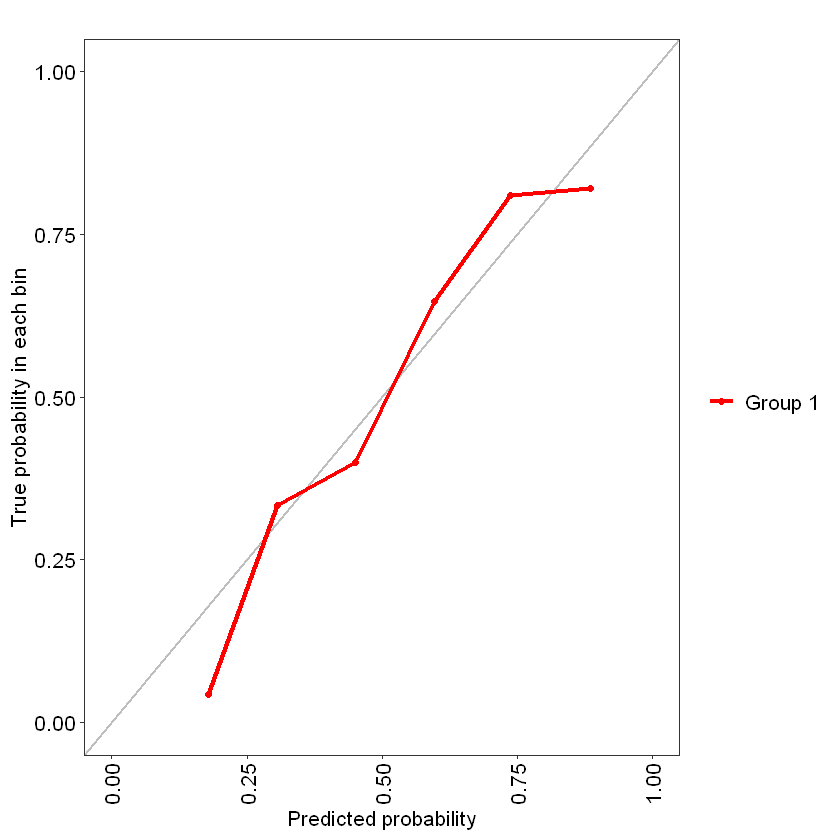

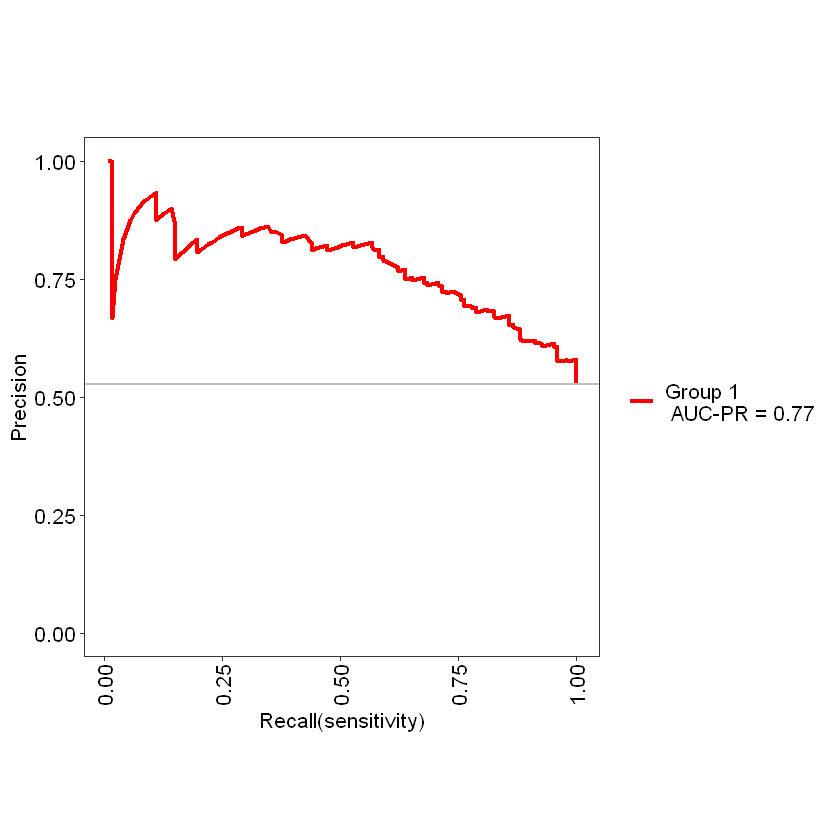

Group 1 Optimal Informedness = 0.436731592761431
Group 1 AUC-ROC = 0.78


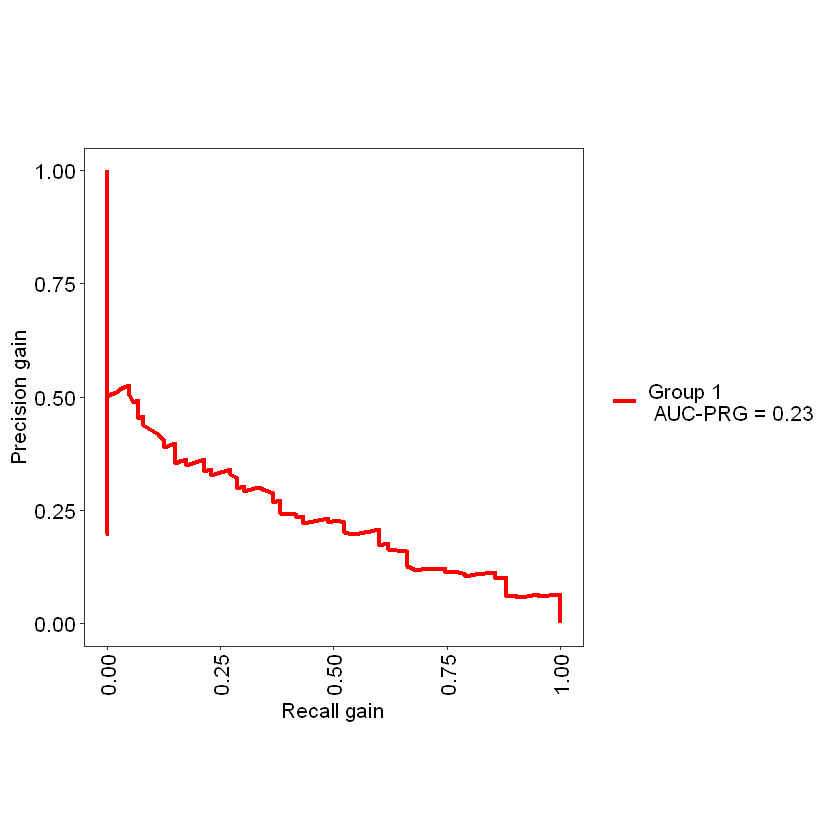

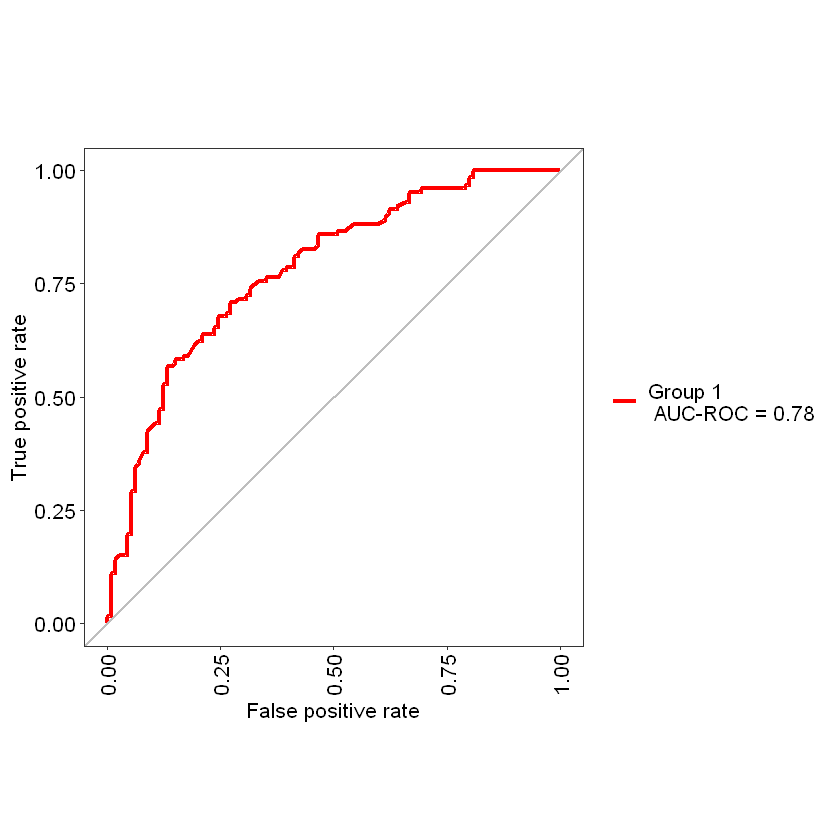

In [167]:
res <- evalm(rfFit)

In [168]:
varImp(rfFit)

rf variable importance

  only 20 most important variables shown (out of 43)

                      Overall
SeverityPain           100.00
FHSQFunction            82.24
fpa                     72.85
MorningPain             62.60
FHSQPain                60.01
eq5d5lv                 50.03
fw                      45.70
csi                     40.74
gpa                     37.52
SANE                    35.73
eq5d5li                 34.75
TimeOnFeet              30.68
eHealth                 29.12
FHSQFootwear            28.62
pcs                     28.03
FHSQGeneralFootHealth   24.53
YearofSports            24.01
SleepDuration           22.88
MornPD                  19.62
Footwear                18.20

In [169]:
#selecting top 10 features.
set.seed(1234)
rfFit_top10 <- train(grp ~ SeverityPain+FHSQFunction+fpa+MorningPain+FHSQPain+eq5d5lv+fw+csi+gpa+SANE, 
               data=df, 
               method="rf", metric="Accuracy", 
               trControl=ctrl)

In [170]:
rfFit_top10

Random Forest 

241 samples
 10 predictor
  2 classes: 'X1', 'X2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 217, 217, 216, 216, 217, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.7885198  0.7106061  0.7179487
   6    0.7828526  0.7007576  0.7032051
  10    0.7756313  0.6916667  0.6948718

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [171]:
max(rfFit_top10$results$ROC)

[1] 0.7885198

***MLeval: Machine Learning Model Evaluation***
Input: caret train function object
Not averaging probs.
Group 1 type: cv
Observations: 241
Number of groups: 1
Observations per group: 241
Positive: X2
Negative: X1
Group: Group 1
Positive: 127
Negative: 114
***Performance Metrics***


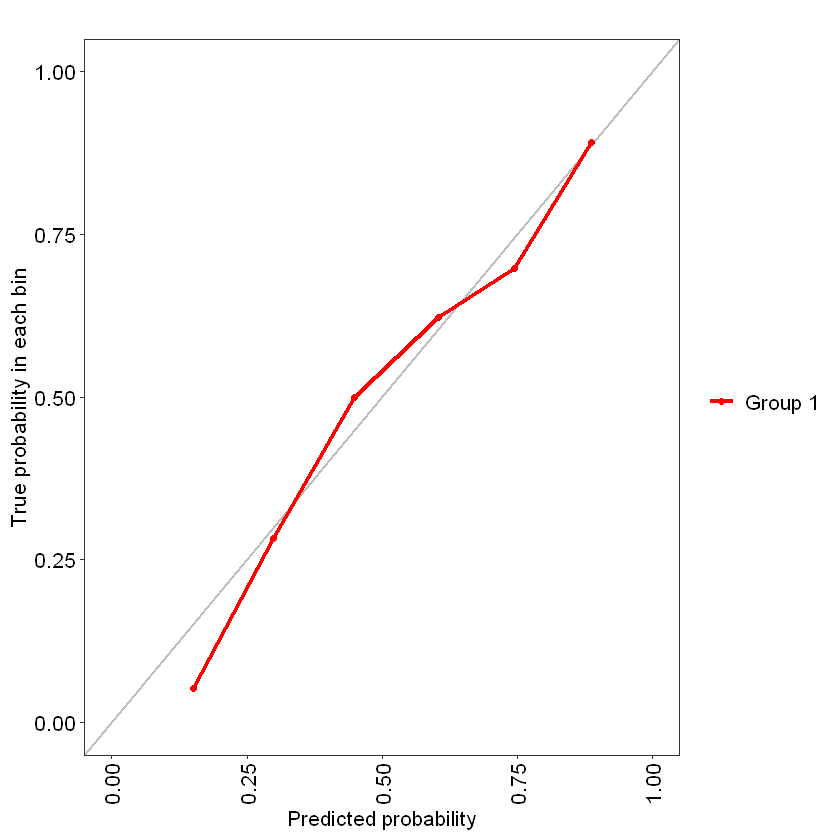

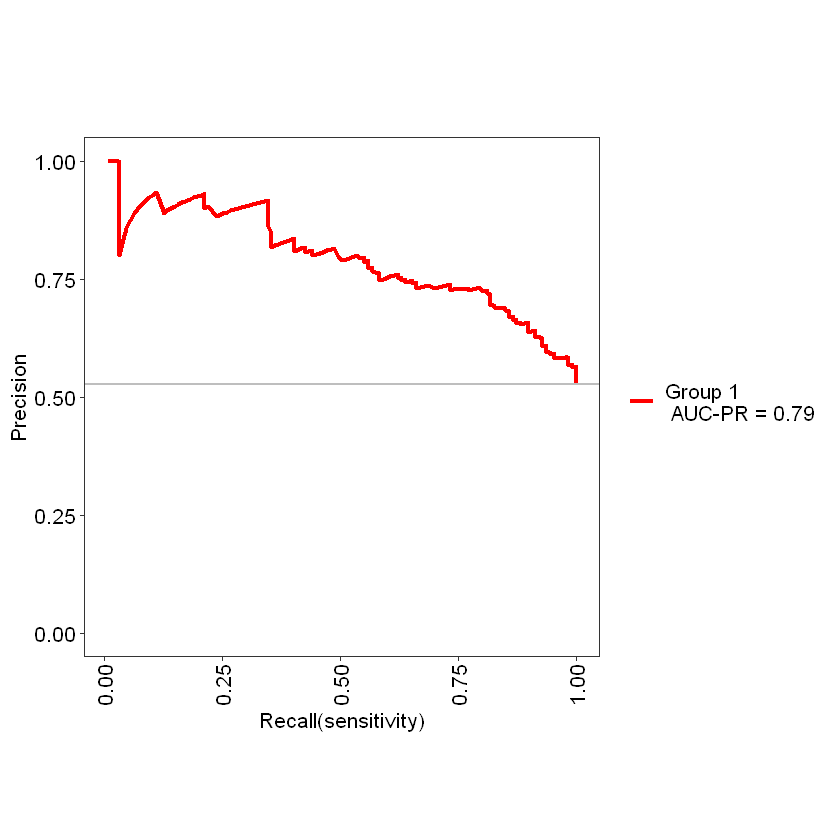

Group 1 Optimal Informedness = 0.470714187042409
Group 1 AUC-ROC = 0.79


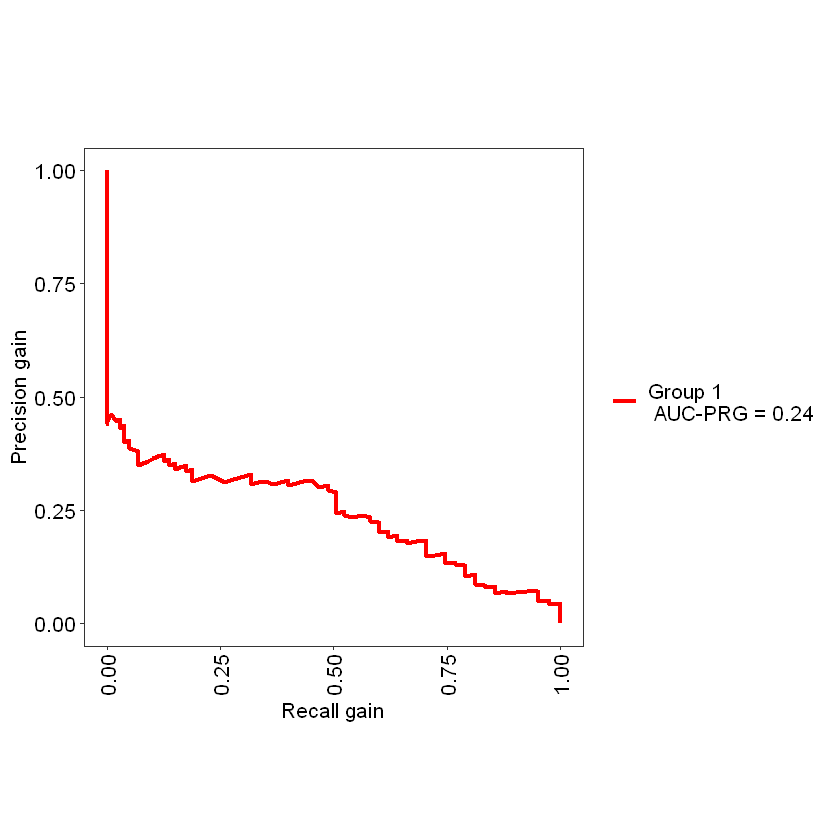

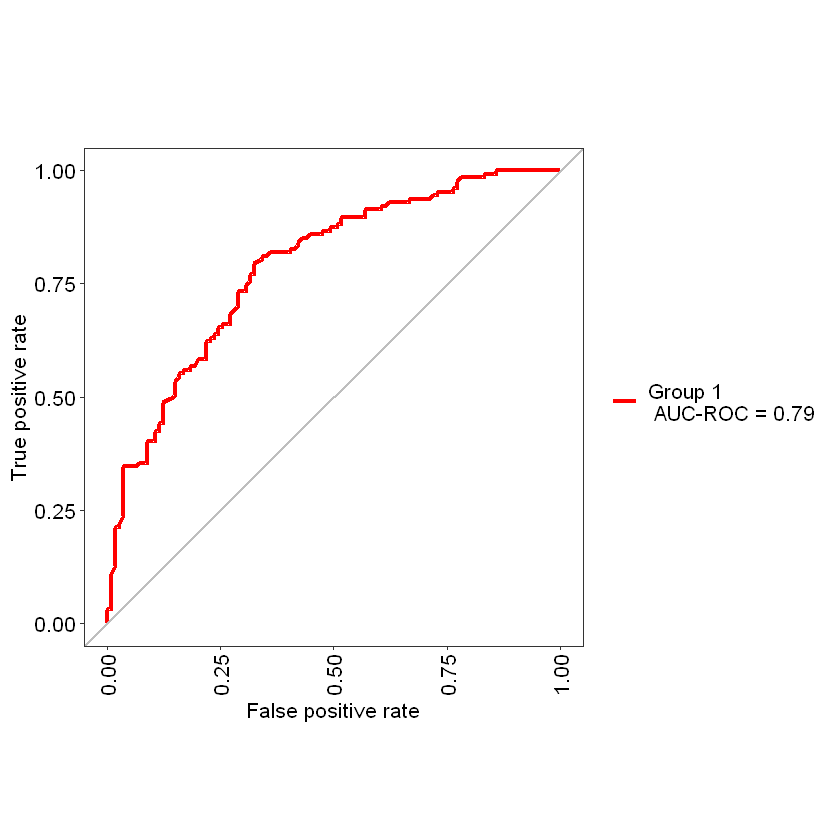

In [172]:
res <- evalm(rfFit_top10)